In [86]:
#!c1.32
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#!c1.32
df = pd.read_csv("data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv")

<ipython-input-55-d78929910d17>:1: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv")


In [88]:
#!c1.32
df.head(10)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0143A,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0400P,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0233P,NaN,BX,NaN,NaN,SB WEBSTER AVE @ E 1,94TH ST,0,1111,C,T,NaN,NaN,NaN,BK,NaN,2004,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,34330,34350,20180630,14.0,14,14,359594,T102,J,1120A,NaN,NY,O,330,7th Ave,NaN,0,408,l2,NaN,Y,0700A,0700P,WH,NaN,2007,NaN,0,04,47-Double PKG-Midtown,NaN,NaN,NaN
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,34310,34330,20170228,13.0,13,13,364832,T102,M,0555P,NaN,NY,F,799,6th Ave,NaN,0,408,h1,NaN,Y,0700A,0700P,WHITE,NaN,2007,NaN,0,31 6,69-Failure to Disp Muni Recpt,NaN,NaN,NaN
5,5096917368,FZD8593,NY,PAS,06/13/2017,7,SUBN,ME/BE,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0852P,NaN,QN,NaN,NaN,NORTHERN BLVD (E/B),@ MARATHON PKWY,0,1111,D,T,NaN,NaN,NaN,WH,NaN,2012,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
6,1413609545,X20DCM,NJ,PAS,08/03/2016,40,SDN,TOYOT,P,54070,39430,54930,0,71.0,71,71,960290,0071,0000,0215A,NaN,K,F,439,KINGSTON,NaN,0,408,C3,NaN,BBBBBBB,ALL,ALL,WHITE,0.0,0,-,1,NaN,NaN,NaN,NaN,NaN
7,4628525523,326SF9,MA,PAS,12/21/2016,36,UT,BMW,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0758A,NaN,BX,NaN,NaN,EB E GUN HILL RD @ B,ARNES AVE,0,1180,B,T,NaN,NaN,NaN,NaN,NaN,2001,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
8,4627113330,HCA5464,NY,OMS,11/21/2016,36,SUBN,DODGE,V,0,0,0,0,NaN,0,0,0,NaN,NaN,1005A,NaN,QN,NaN,NaN,NB BAISLEY BLVD @ 15,5TH ST,0,1180,B,T,NaN,NaN,NaN,BK,NaN,2016,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
9,4006478550,VAD7274,VA,PAS,10/05/2016,5,4D,BMW,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0845A,NaN,BX,NaN,NaN,SB WEBSTER AVE @ E 2,04TH ST,0,1111,C,T,NaN,NaN,NaN,BLK,NaN,2008,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN


In [89]:
#!c1.32
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10803028 entries, 0 to 10803027
Data columns (total 43 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Summons Number                     int64  
 1   Plate ID                           object 
 2   Registration State                 object 
 3   Plate Type                         object 
 4   Issue Date                         object 
 5   Violation Code                     int64  
 6   Vehicle Body Type                  object 
 7   Vehicle Make                       object 
 8   Issuing Agency                     object 
 9   Street Code1                       int64  
 10  Street Code2                       int64  
 11  Street Code3                       int64  
 12  Vehicle Expiration Date            int64  
 13  Violation Location                 float64
 14  Violation Precinct                 int64  
 15  Issuer Precinct                    int64  
 16  Issuer Code     

Для начала необходимо изучить данные, понять какйую информацию несет каждый признак и обработать пропуски в данных

In [90]:
#!c1.32
len(df["Summons Number"].unique()) == df.shape[0]

True

Колонки Summons Number и Plate ID явлются ключами в датасете и не несут в себе полезную информацию, поэтому необходимо их удалить

In [91]:
#!c1.32
df = df.drop(columns=["Summons Number", "Plate ID"])

In [92]:
#!c1.32
(df.isna().sum() * 100 / df.shape[0]).sort_values()[-1:0:-1].head(26)

Double Parking Violation             100.000000
No Standing or Stopping Violation    100.000000
Hydrant Violation                    100.000000
Time First Observed                   92.217488
Unregistered Vehicle?                 89.562223
Meter Number                          83.472476
Violation Legal Code                  80.906214
Intersecting Street                   68.827675
From Hours In Effect                  50.457575
To Hours In Effect                    50.457548
Violation Post Code                   29.530489
Days Parking In Effect                25.107923
House Number                          21.184968
Violation In Front Of Or Opposite     20.005826
Violation Location                    19.183510
Issuer Squad                          19.101506
Issuer Command                        19.093212
Violation Description                 10.436611
Vehicle Color                          1.410179
Vehicle Make                           0.676199
Vehicle Body Type                      0

С уверенностью можно сказать, что можно столбцы Double Parking Violation, Hydrant Violation, No Standing or Stopping Violation, Time First Observed, Meter Number нужно удалить, т.к. эти признаки полностью или почти полностью пустые и невозможно восстановить потерянные данные. В колонке Intersecting Street также слишком много значений, которые невозможно восстановить, а также колонка Street Name, которая важнее, полностью заполнена, так что если удалить эту колонку, то это не приведет к большой потере данных. В колонках Violation Post Code, Days Parking In Effect, House Number, Violation Location записан либо какой-то мусор или информация, которая может быть интерпретирована только полицейским департаментом США, поэтому удалим их тоже.


In [98]:
#!c1.32
df = df.drop(columns=["Double Parking Violation", "Hydrant Violation", "No Standing or Stopping Violation", "Time First Observed", "Meter Number", "Intersecting Street", "From Hours In Effect", "To Hours In Effect", "Violation Post Code", "Days Parking In Effect    ", "House Number", "Violation Location"])

In [102]:
#!c1.32
(df.isna().sum() * 100 / df.shape[0]).sort_values()[-1:0:-1].head(14)

Unregistered Vehicle?                89.562223
Violation Legal Code                 80.906214
Violation In Front Of Or Opposite    20.005826
Issuer Squad                         19.101506
Issuer Command                       19.093212
Violation Description                10.436611
Vehicle Color                         1.410179
Vehicle Make                          0.676199
Vehicle Body Type                     0.395361
Violation County                      0.366073
Street Name                           0.037110
Sub Division                          0.007155
Violation Time                        0.000583
Street Code2                          0.000000
dtype: float64

In [100]:
#!c1.32
df["Unregistered Vehicle?"].unique()

array([nan,  0.])

Т.к. столбец Unregistered Vehicle? содержит только 0 и пропуски, то можно предположить, что пропуски на самом деле означают не отсутствие данных, а то, что этот столбец заполнялся только в случаях, когда машина не была зарегистрирована. В остальных случаях можно сделать предположение, что автомобтль был зарегистрирован, поэтому пропуски необходимо заполнить единицами (True)

In [103]:
#!c1.32
df["Unregistered Vehicle?"] = df["Unregistered Vehicle?"].fillna(1)

In [105]:
#!c1.32
df["Violation Legal Code"].value_counts()

T    2062644
0         60
1          2
6          1
Name: Violation Legal Code, dtype: int64

В колонки Violation Legal Code ситуация такая же как и с колонкой Unregistered Vehicle?. Можно предположить, что пропущенные значения на самом деле означают F (False). А редкие цифры это, скорее всего, какой-то мусор

In [106]:
#!c1.32
df["Violation Legal Code"] = df["Violation Legal Code"].fillna("F")
df["Violation Legal Code"] = np.where(df["Violation Legal Code"].isin(["0", "1", "6"]), 'F', df["Violation Legal Code"])
df["Violation Legal Code"] = df["Violation Legal Code"].astype(str)

In [107]:
#!c1.32
df["Violation Legal Code"].value_counts()

F    8740384
T    2062644
Name: Violation Legal Code, dtype: int64

In [108]:
#!c1.32
(df.isna().sum() * 100 / df.shape[0]).sort_values()[-1:0:-1].head(12)

Violation In Front Of Or Opposite    20.005826
Issuer Squad                         19.101506
Issuer Command                       19.093212
Violation Description                10.436611
Vehicle Color                         1.410179
Vehicle Make                          0.676199
Vehicle Body Type                     0.395361
Violation County                      0.366073
Street Name                           0.037110
Sub Division                          0.007155
Violation Time                        0.000583
Street Code3                          0.000000
dtype: float64

В столбцах Violation In Front Of Or Opposite, Issuer Squad, Issuer Command, Vehicle Color лучше всего заполнить пропуски модой

In [115]:
#!c1.32
df["Violation In Front Of Or Opposite"] = df["Violation In Front Of Or Opposite"].fillna(df["Violation In Front Of Or Opposite"].value_counts().index[0])
df["Issuer Squad"] = df["Issuer Squad"].fillna(df["Issuer Squad"].value_counts().index[0])
df["Issuer Command"] = df["Issuer Command"].fillna(df["Issuer Command"].value_counts().index[0])
df["Vehicle Color"] = df["Vehicle Color"].fillna(df["Vehicle Color"].value_counts().index[0])

In [116]:
#!c1.32
(df.isna().sum() * 100 / df.shape[0]).sort_values()[-1:0:-1].head(8)

Violation Description    10.436611
Vehicle Make              0.676199
Vehicle Body Type         0.395361
Violation County          0.366073
Street Name               0.037110
Sub Division              0.007155
Violation Time            0.000583
Violation Precinct        0.000000
dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'PHTO SCHOOL ZN SPEED VIOLATION'),
  Text(1, 0, '21-No Parking (street clean)'),
  Text(2, 0, '38-Failure to Display Muni Rec'),
  Text(3, 0, '14-No Standing'),
  Text(4, 0, '37-Expired Muni Meter'),
  Text(5, 0, 'FAILURE TO STOP AT RED LIGHT'),
  Text(6, 0, '20A-No Parking (Non-COM)'),
  Text(7, 0, '71A-Insp Sticker Expired (NYS)'),
  Text(8, 0, '40-Fire Hydrant'),
  Text(9, 0, '19-No Stand (bus stop)')])

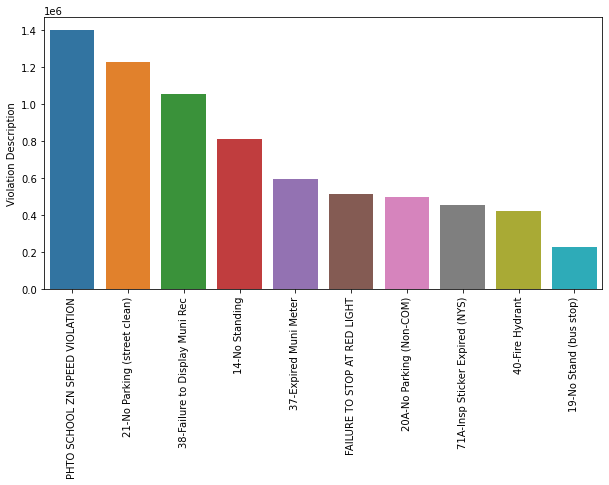

In [118]:
#!c1.32
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Violation Description"].value_counts().index[0:10], y=df["Violation Description"].value_counts()[0:10])
plt.xticks(rotation=90)

В Violation Description много категориальных данных, которые близки к друг другу по значению, поэтому если просто заменить пропуски на самое популярное значение, то этот баланс нарушится и 'PHTO SCHOOL ZN SPEED VIOLATION' будет намного чаще встречаться, чем остальные категории, хотя в реальности это не так. Поэтому пропуски необходимо заполнить пропорцианально остальным данным

In [121]:
#!c1.32
missing_values = df['Violation Description'].isnull()
present_values = df['Violation Description'][~missing_values]
# Рассчитываем процентное распределение категорий
distribution = present_values.value_counts(normalize=True)
df.loc[missing_values, 'Violation Description'] = np.random.choice(distribution.index, size=sum(missing_values), p=distribution.values)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'PHTO SCHOOL ZN SPEED VIOLATION'),
  Text(1, 0, '21-No Parking (street clean)'),
  Text(2, 0, '38-Failure to Display Muni Rec'),
  Text(3, 0, '14-No Standing'),
  Text(4, 0, '37-Expired Muni Meter'),
  Text(5, 0, 'FAILURE TO STOP AT RED LIGHT'),
  Text(6, 0, '20A-No Parking (Non-COM)'),
  Text(7, 0, '71A-Insp Sticker Expired (NYS)'),
  Text(8, 0, '40-Fire Hydrant'),
  Text(9, 0, '19-No Stand (bus stop)')])

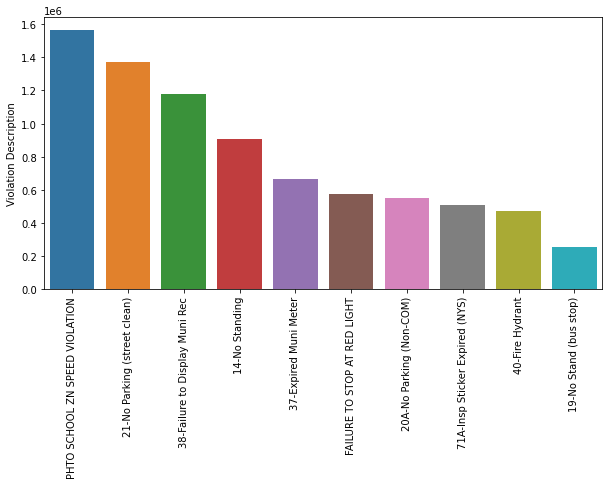

In [123]:
#!c1.32
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Violation Description"].value_counts().index[0:10], y=df["Violation Description"].value_counts()[0:10])
plt.xticks(rotation=90)

Отлично, столбцы подросли пропорционально друг другу

In [125]:
#!c1.32
(df.isna().sum() * 100 / df.shape[0]).sort_values()[-1:0:-1].sum()

1.4824825039794398

Остальные пропуски в разных колонках дают всего где-то 1.5 процента данных. Просто удалим строчки с пропущенными значениями

In [128]:
#!c1.32
df = df.dropna()

In [129]:
#!c1.32
(df.isna().sum() * 100 / df.shape[0]).sort_values()[-1:0:-1].sum()

0.0

Все пропуски удалены!

In [130]:
#!c1.32
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10662498 entries, 0 to 10803027
Data columns (total 29 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Registration State                 object 
 1   Plate Type                         object 
 2   Issue Date                         object 
 3   Violation Code                     int64  
 4   Vehicle Body Type                  object 
 5   Vehicle Make                       object 
 6   Issuing Agency                     object 
 7   Street Code1                       int64  
 8   Street Code2                       int64  
 9   Street Code3                       int64  
 10  Vehicle Expiration Date            int64  
 11  Violation Precinct                 int64  
 12  Issuer Precinct                    int64  
 13  Issuer Code                        int64  
 14  Issuer Command                     object 
 15  Issuer Squad                       object 
 16  Violation Time  

In [144]:
#!c1.32
%pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [389]:
#!c1.32
import sweetviz as sv
df['Issuer Squad'] = df['Issuer Squad'].astype(str)
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



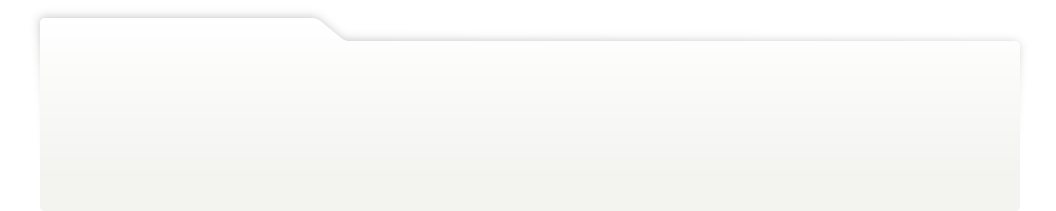
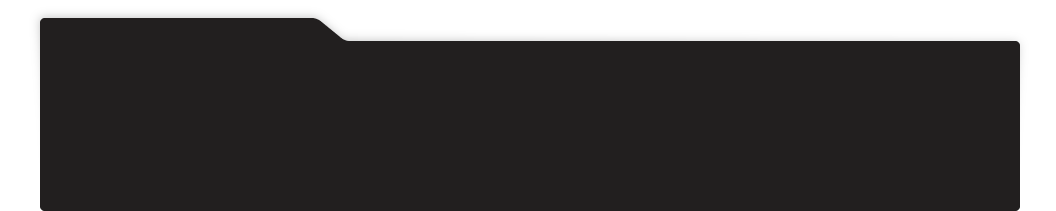
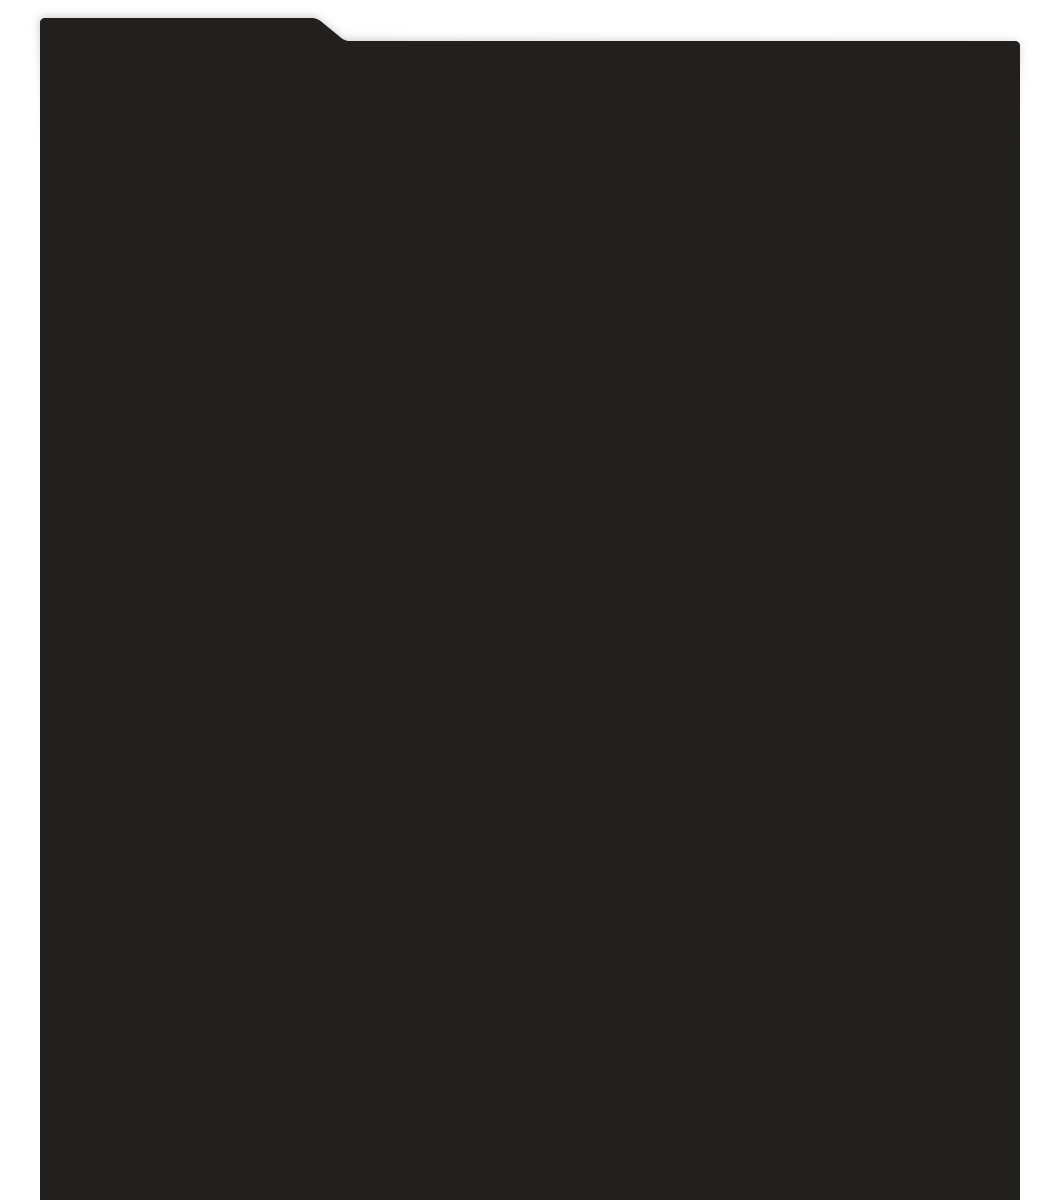
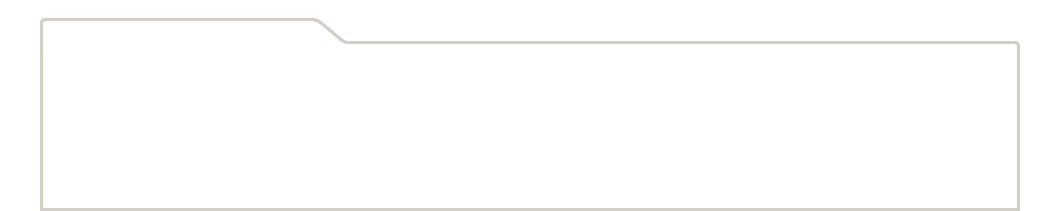
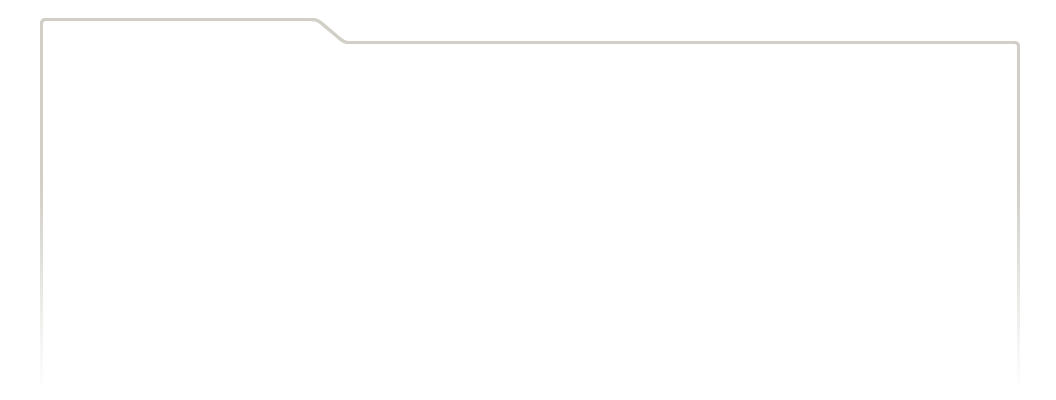
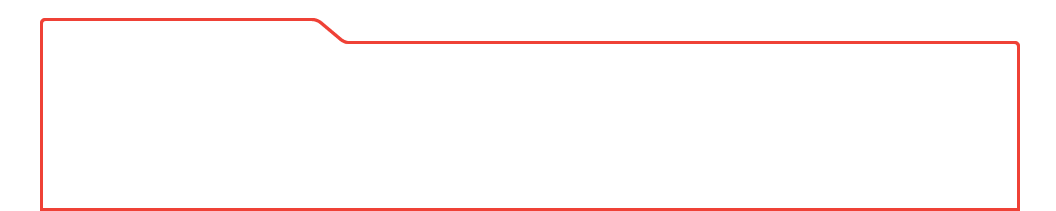
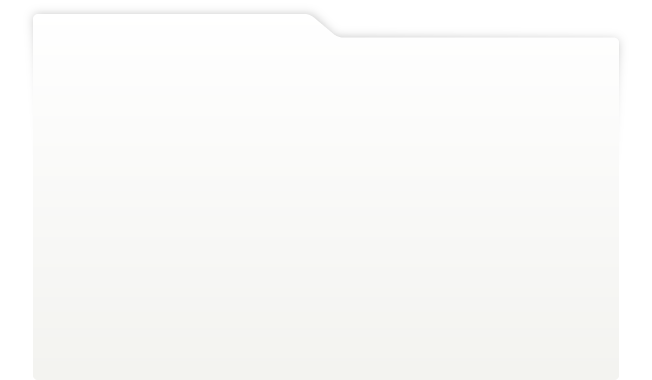
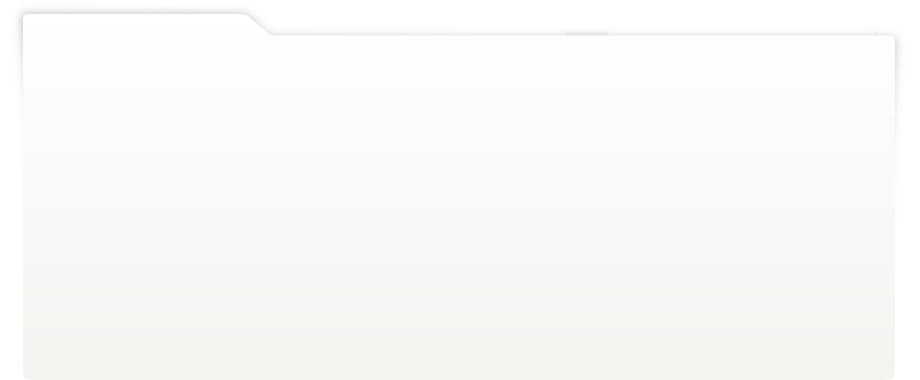
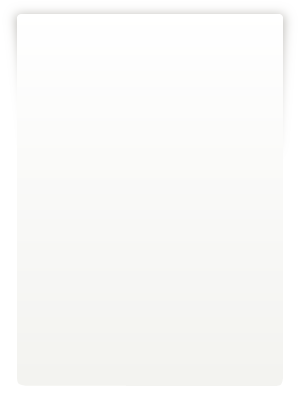
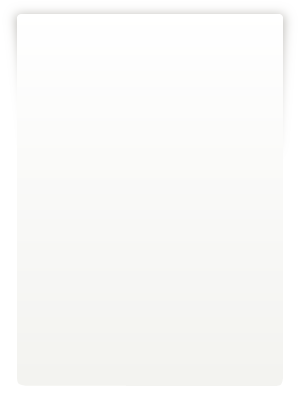
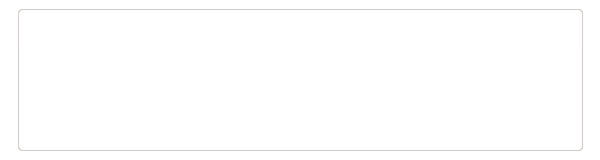
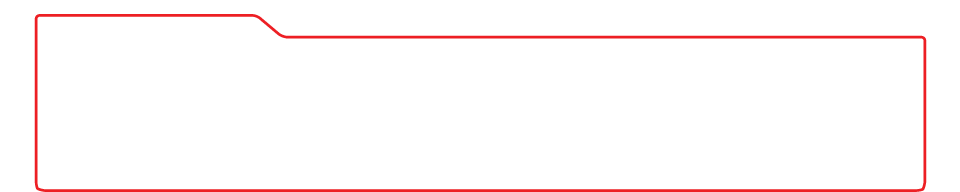
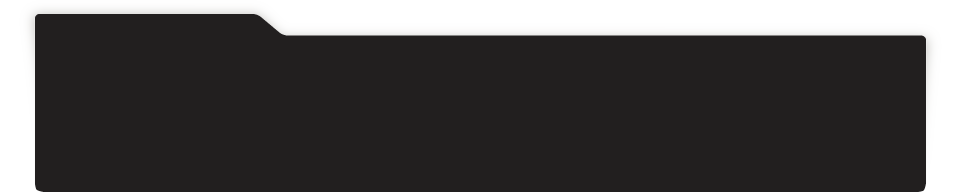
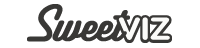
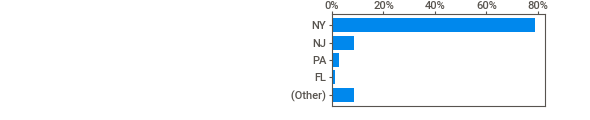
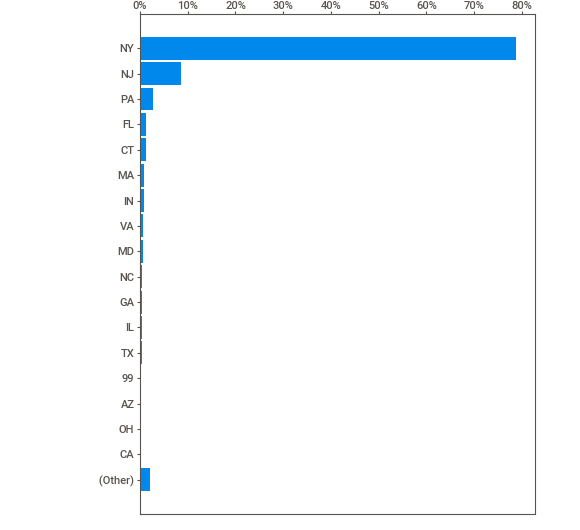
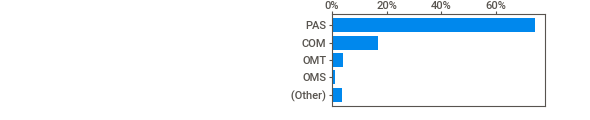
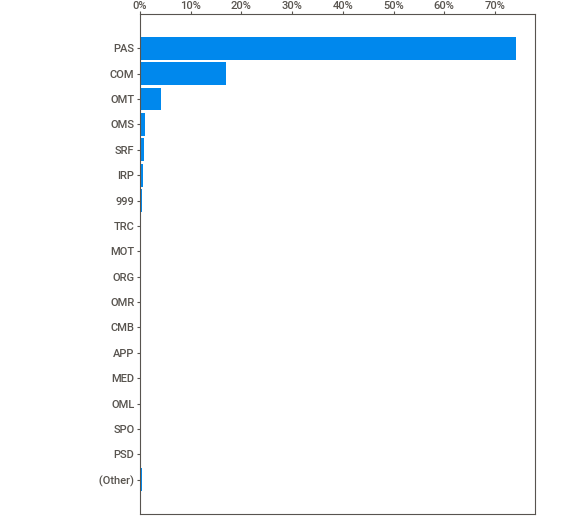
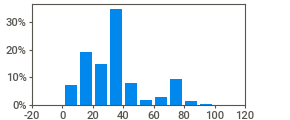
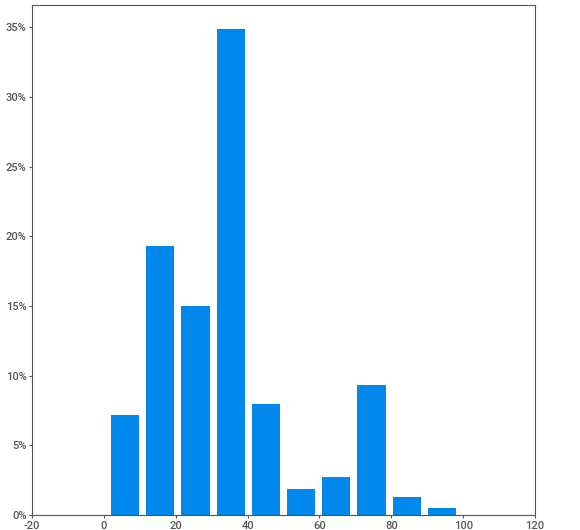
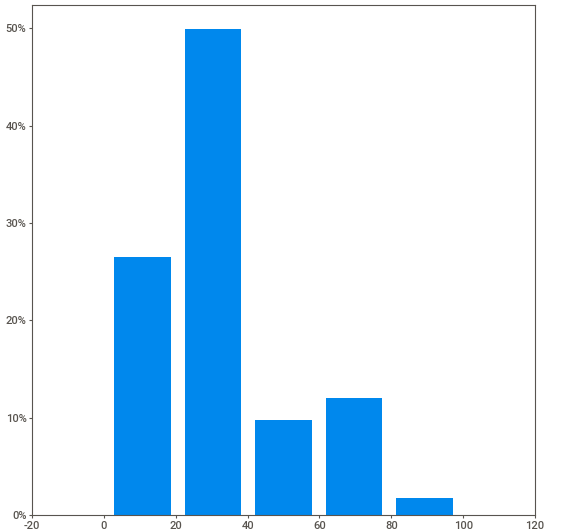
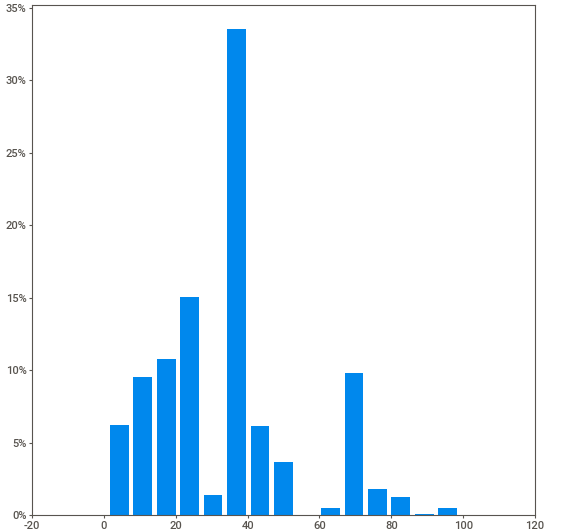
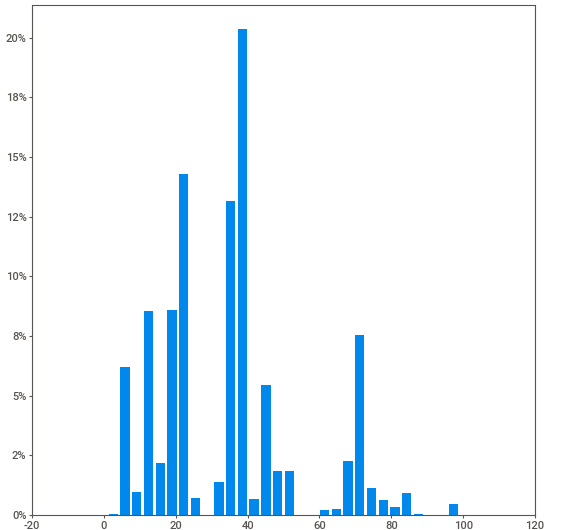
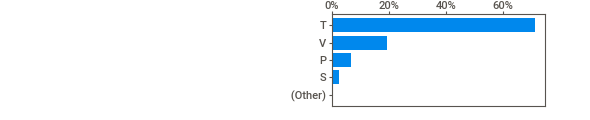
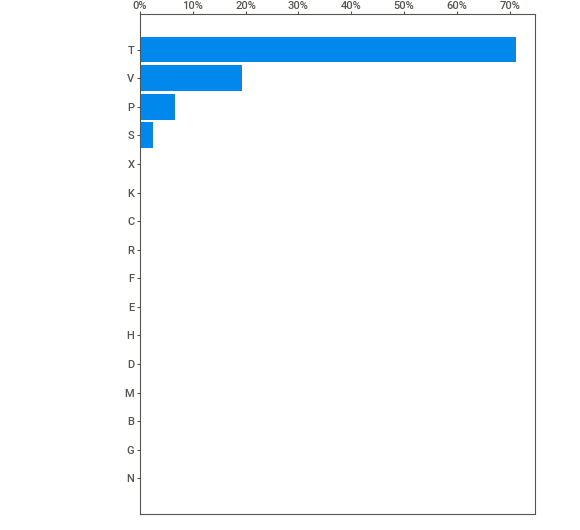
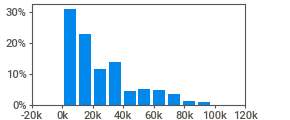
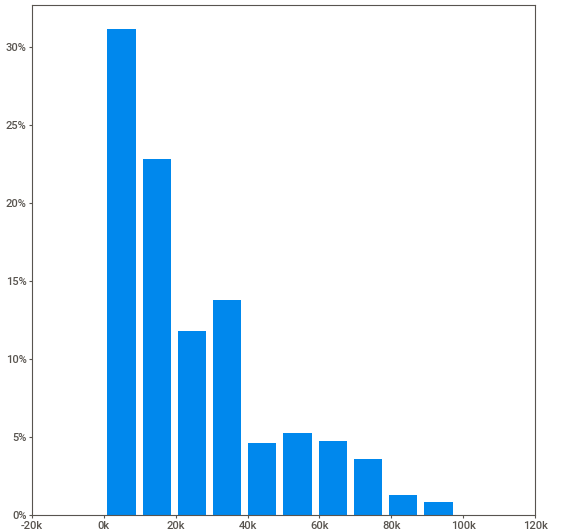
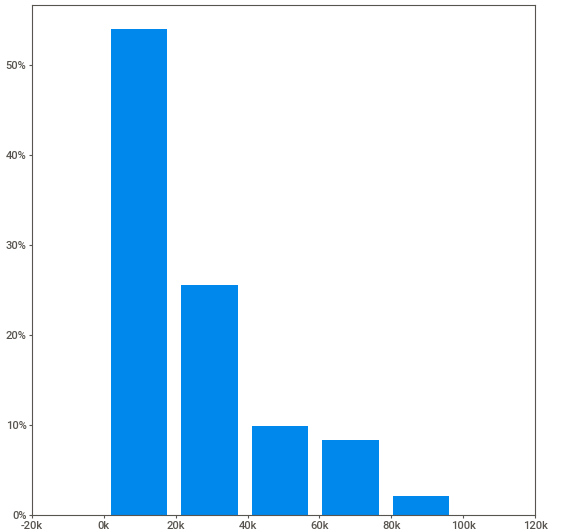
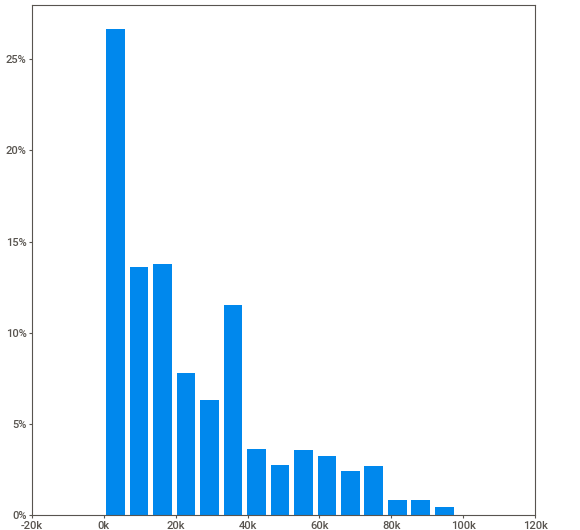
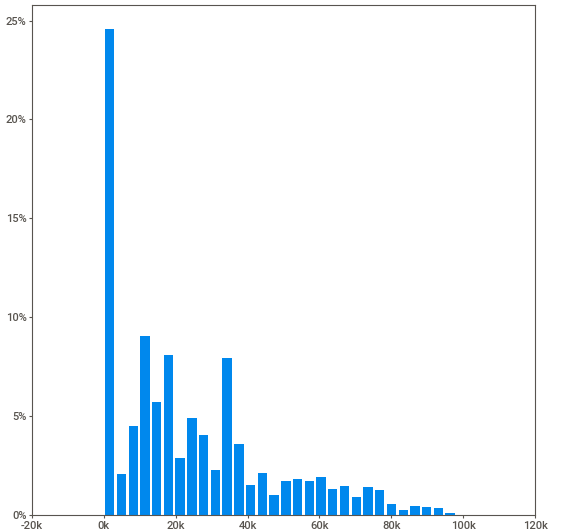
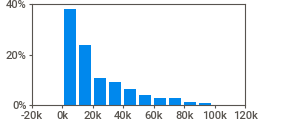
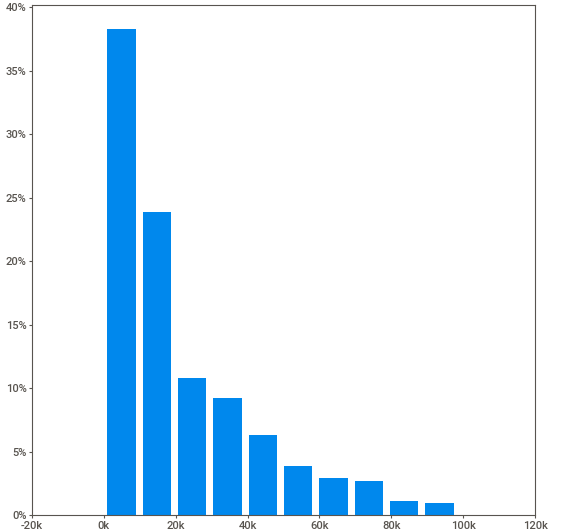
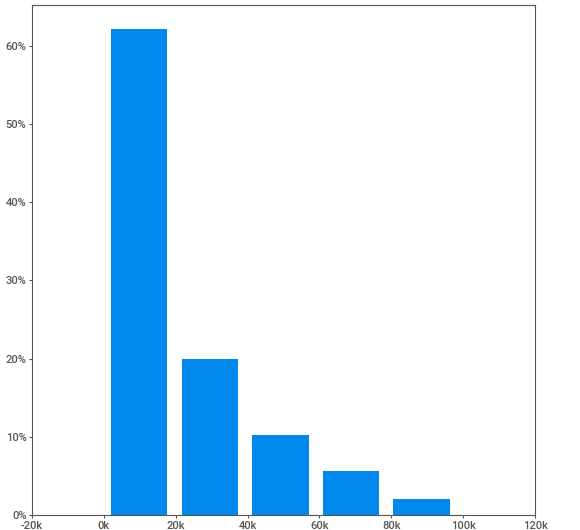
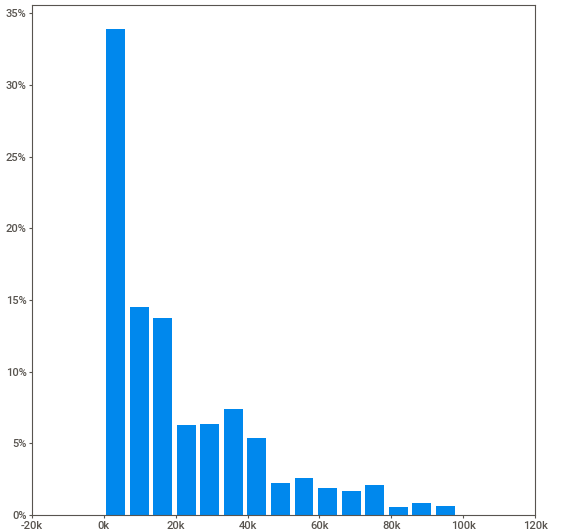
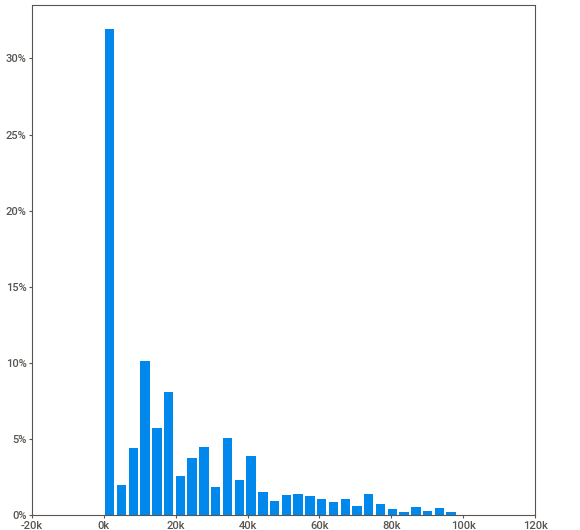
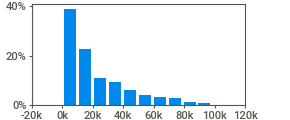
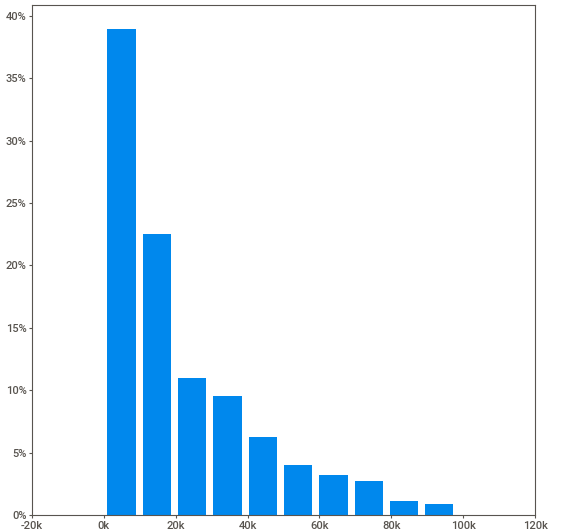
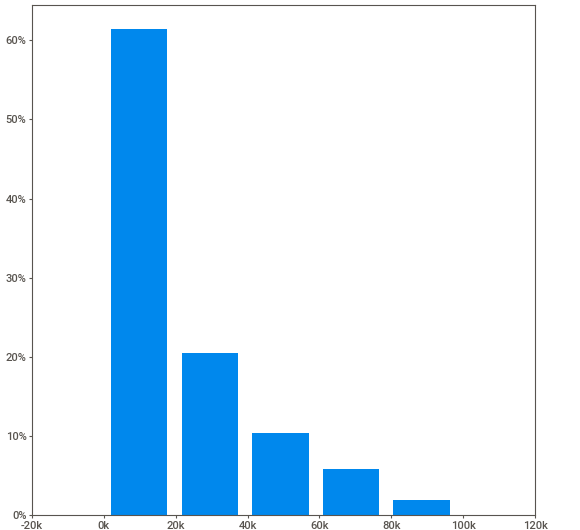
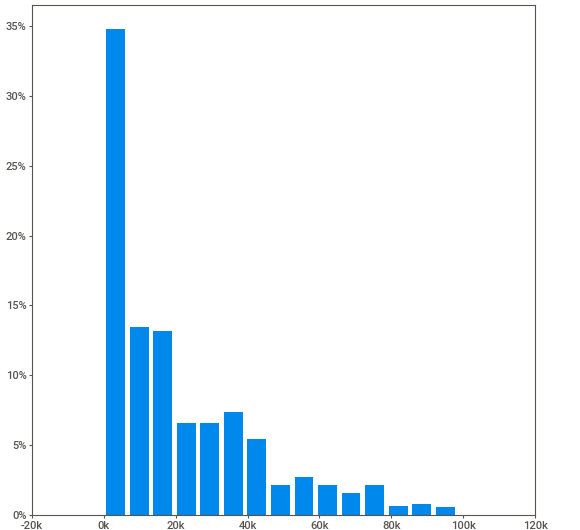
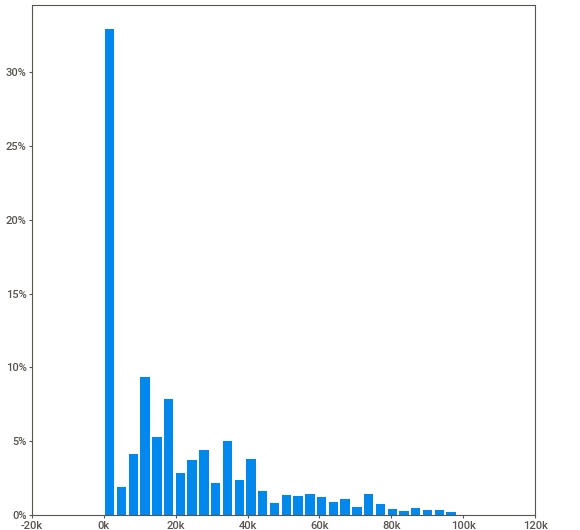
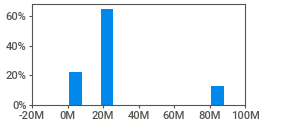
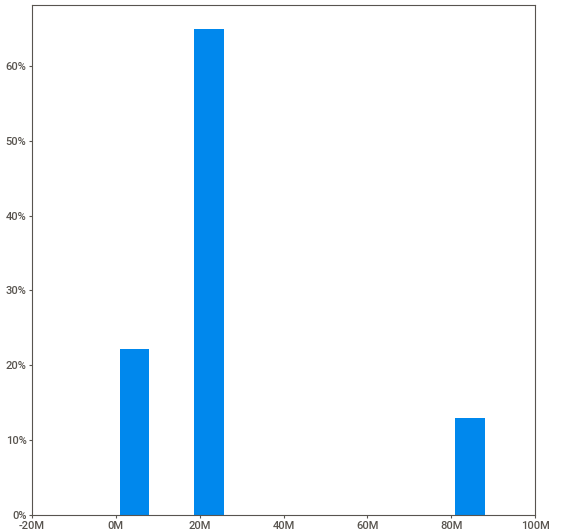
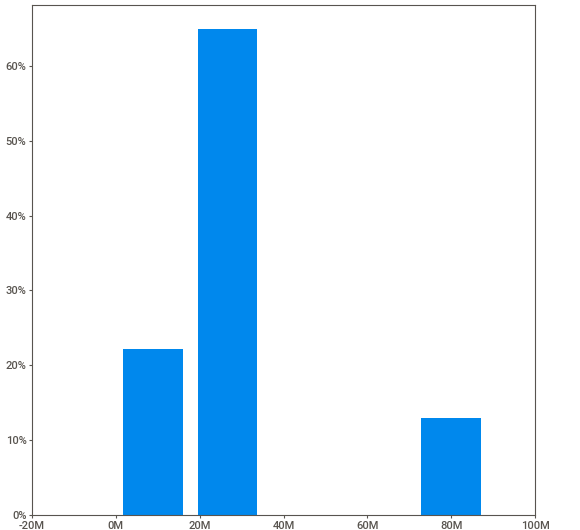
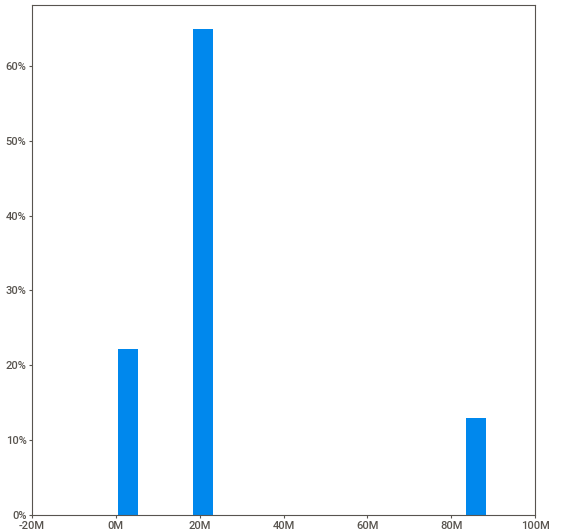
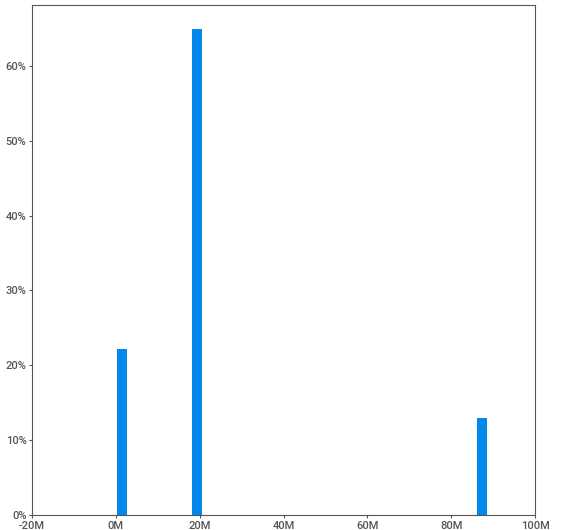
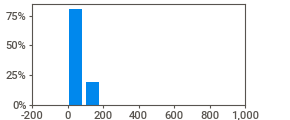
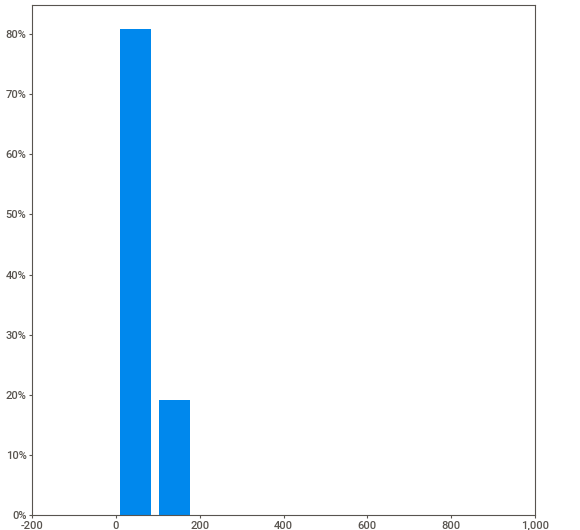
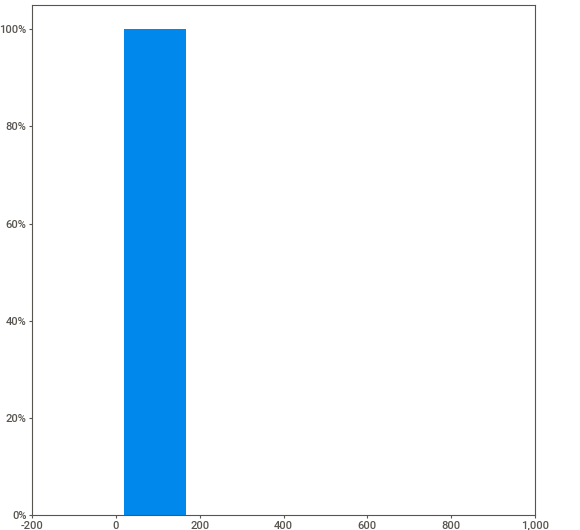
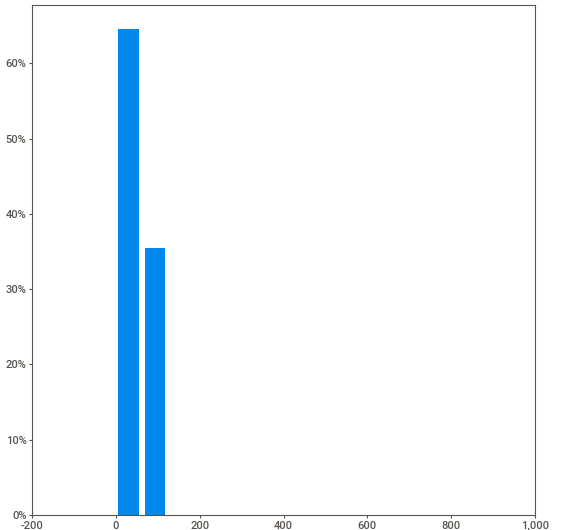
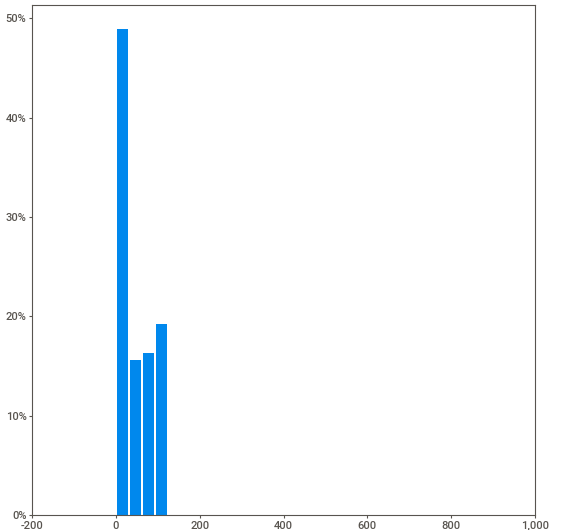
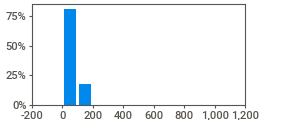
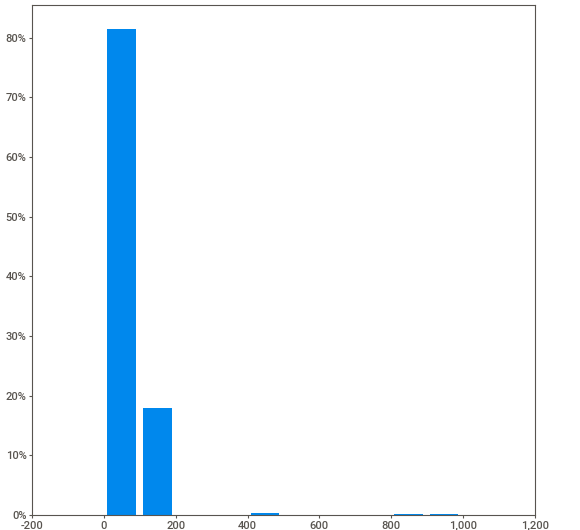
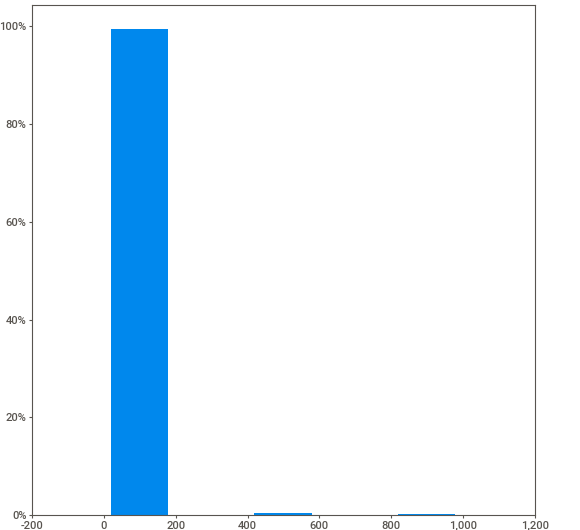
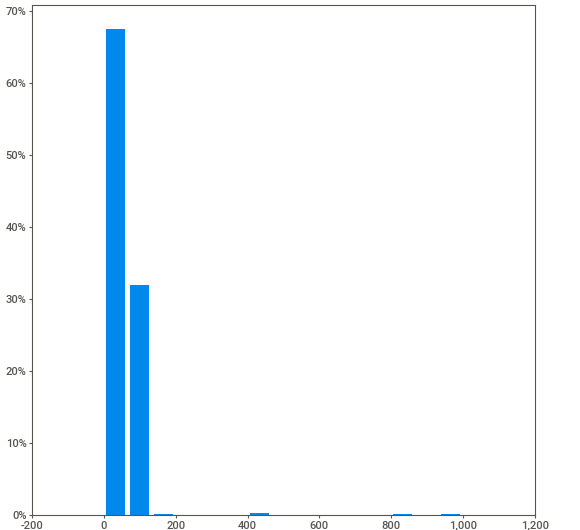
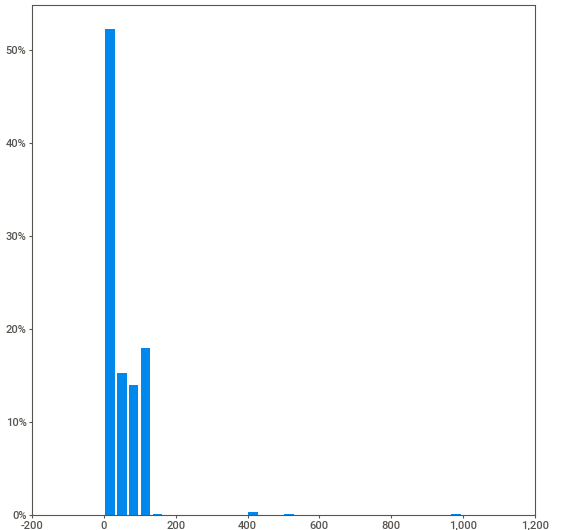
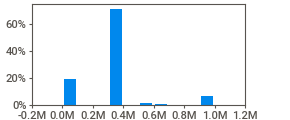
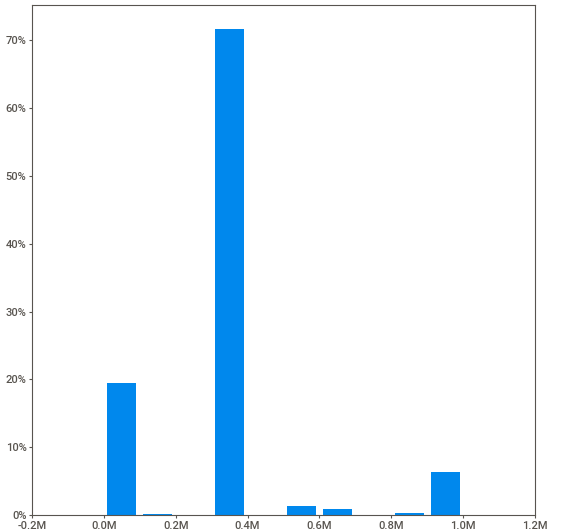
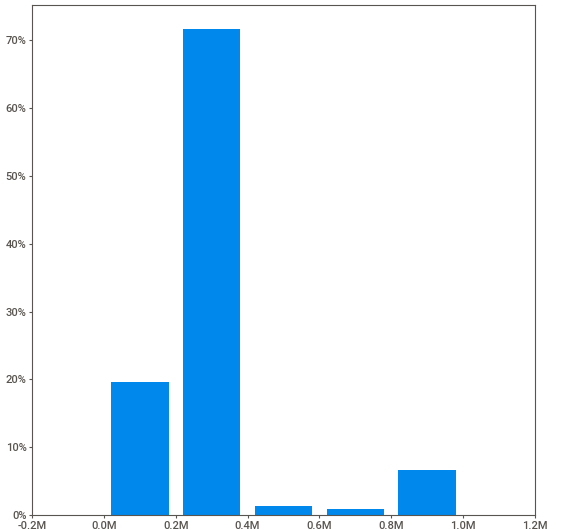
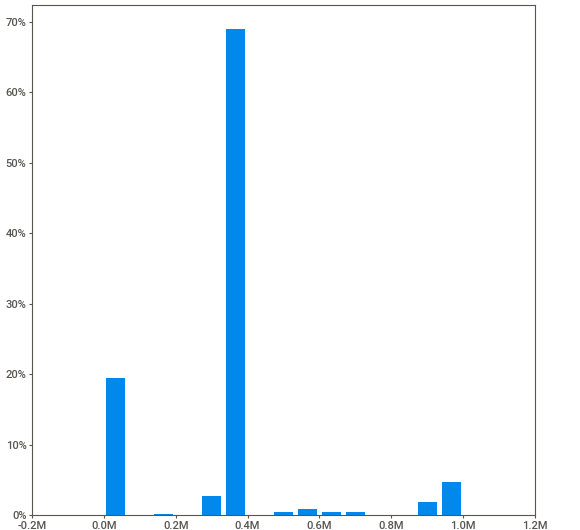
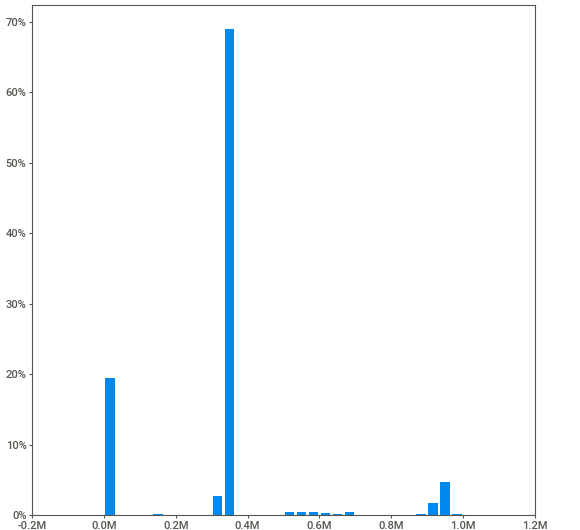
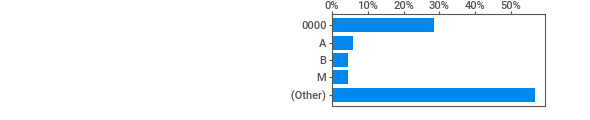
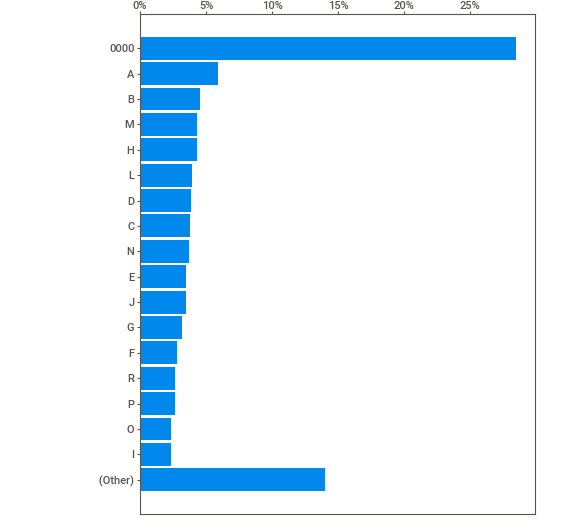
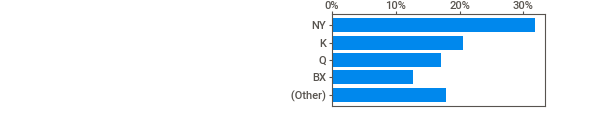
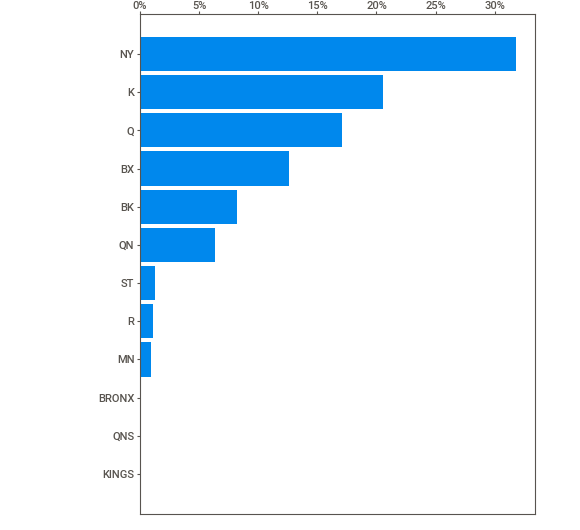
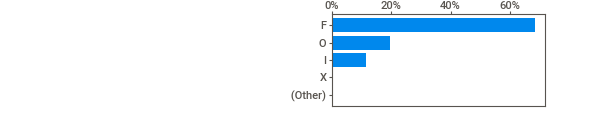
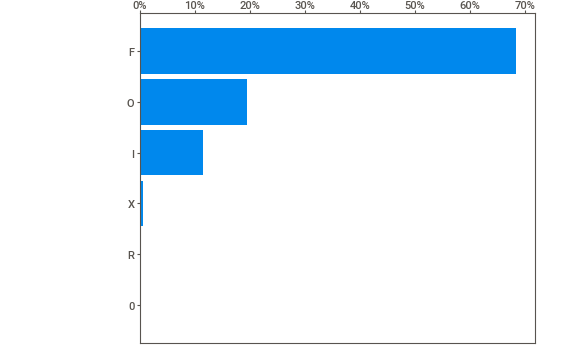
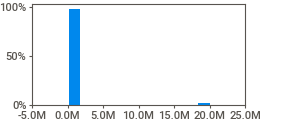
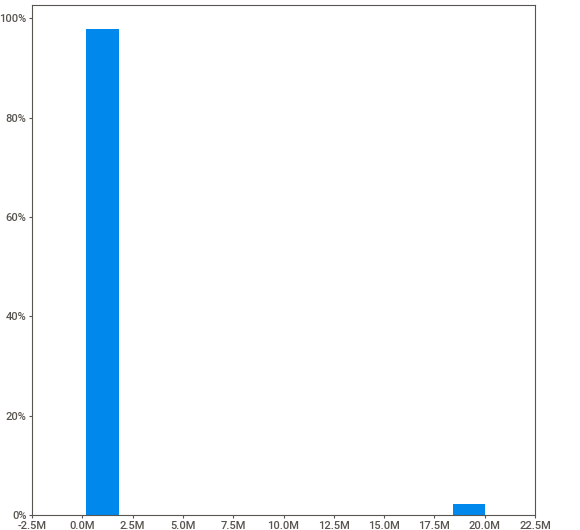
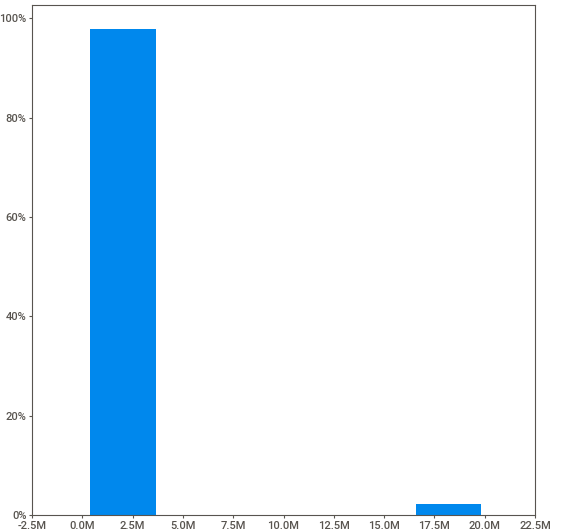
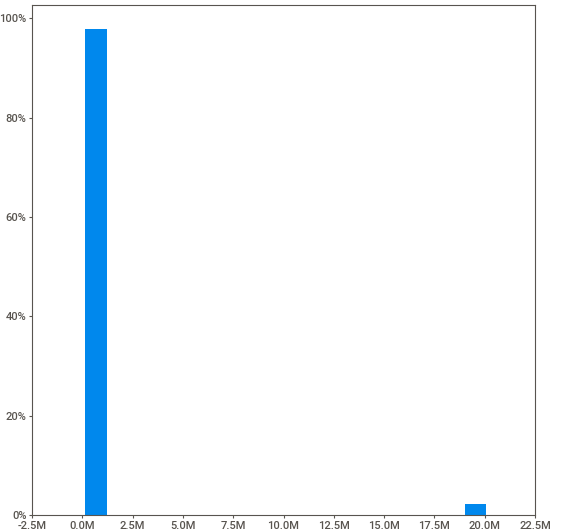
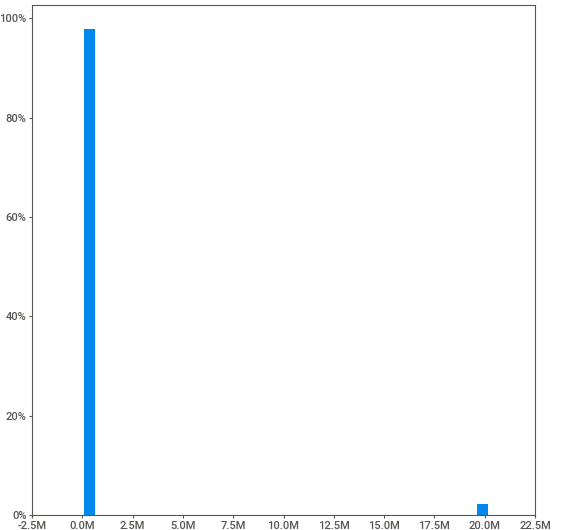
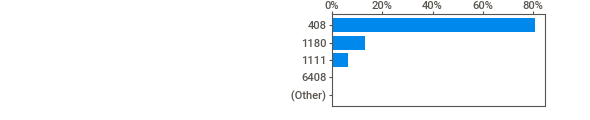
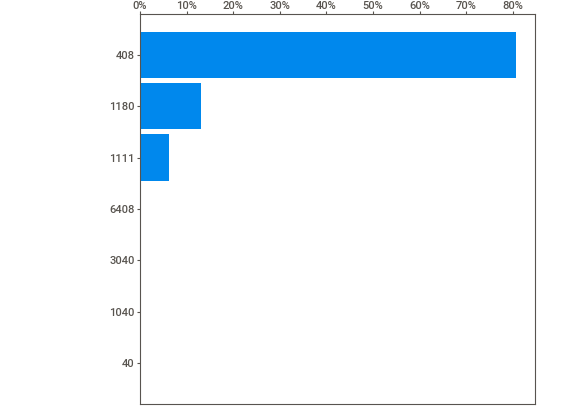
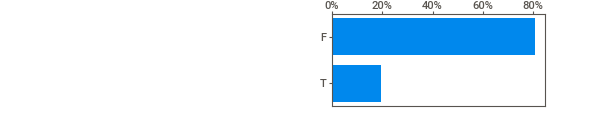
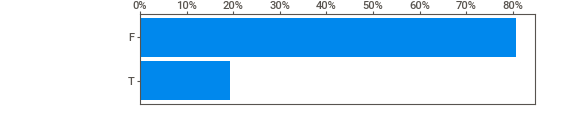
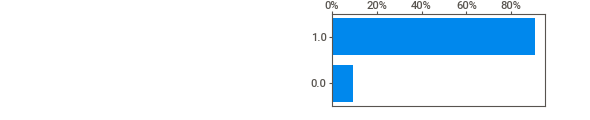
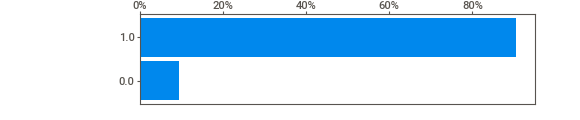
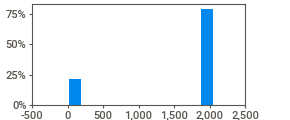
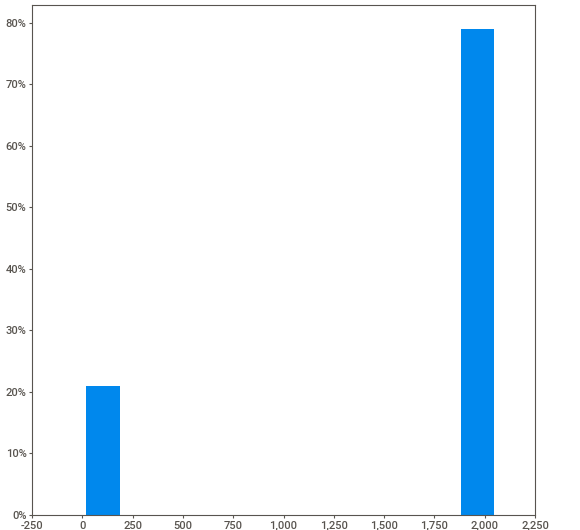
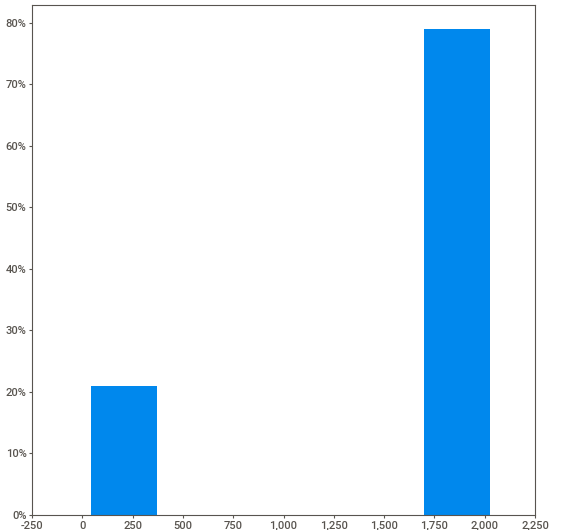
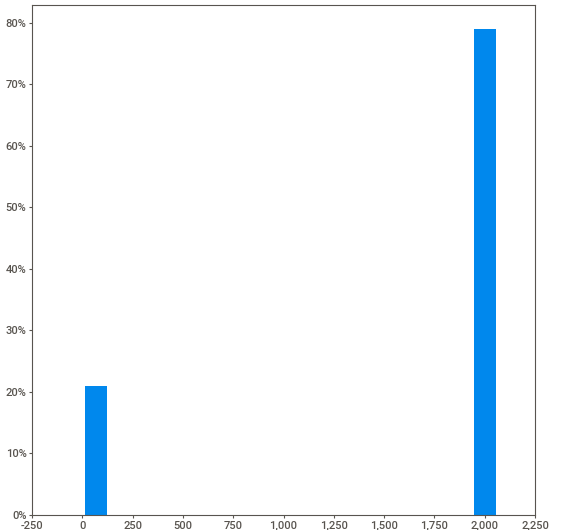
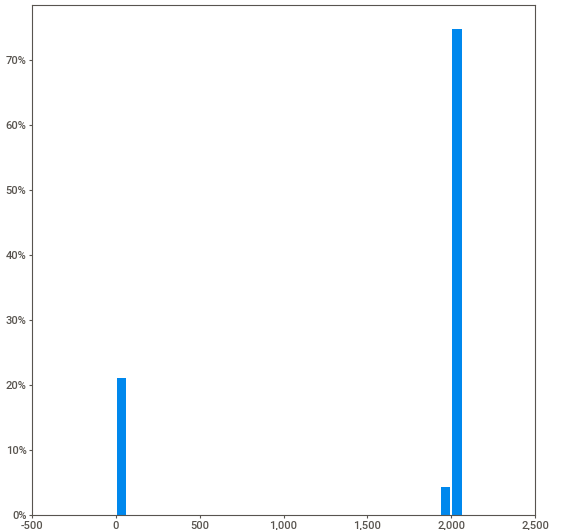
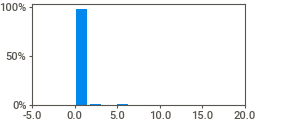
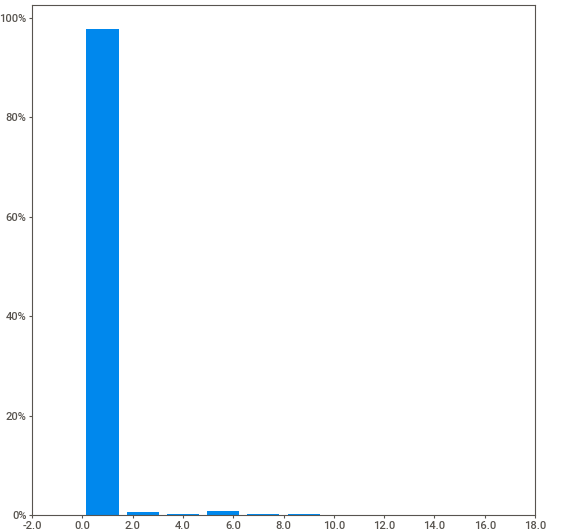
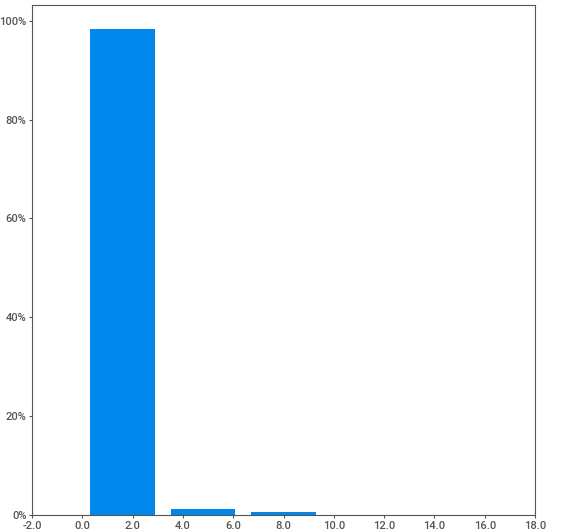
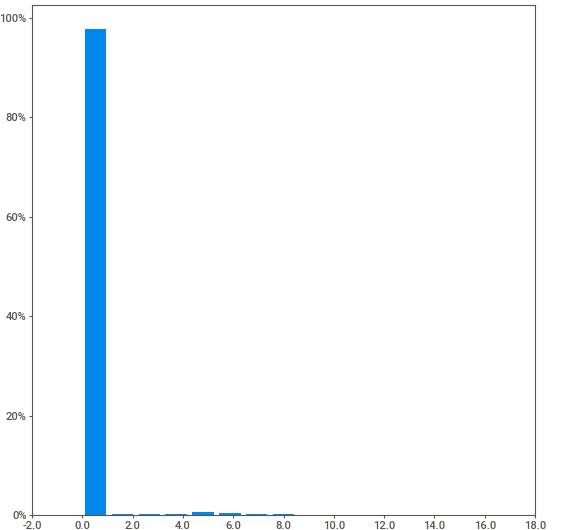
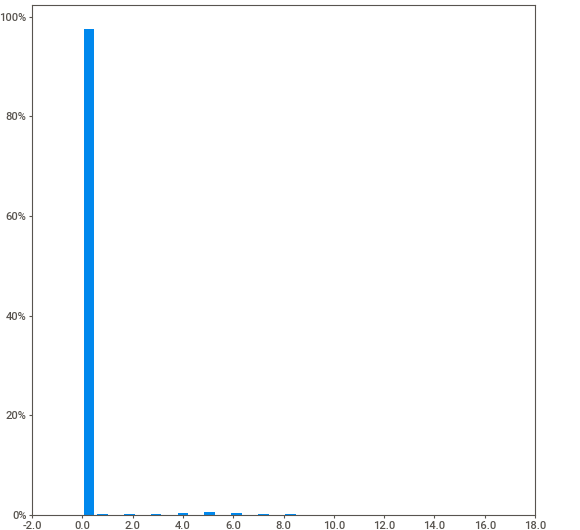
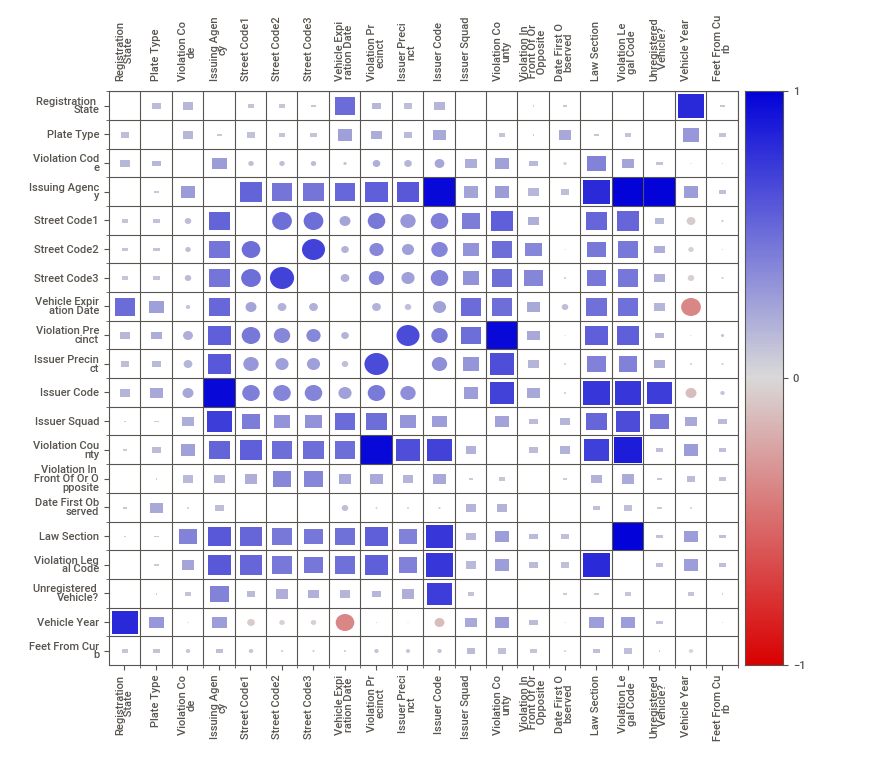
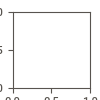

In [390]:
#!c1.32
analyze_report.show_notebook(w="100%", h="full")

Воспользовавшись библиотекой switviz для анализа обработанных колонок можно сделать следующие выводы:
- Больше всего оштрафованных автомобилей были зарегистрированы в Нью-Йорке
- Больше всего штрафовали обычные атомобили, которые могут перевозить рассажиров (SUBN), четырех-дверные седаны(4-DSD) и фургоны(VAN).Мотоциклы штрафовали меньше 1 процента и 1885 танка (TANK)
- Больше всего нарушали правила парковки владельцы автомобилей марок Ford, Toyota и Honda, что очень хорошо соотносится со статистикой самых популярных автомобилей в США в 2017 году - все 3 марки входят в топ 5 самых популярных
- Улица, на которой случилось больше всего нарушений - Broadway
- Больше всего оштрафованных машин - новые. Большинство 2012-2016 года производства
- Больше всего штрафов выдано за нарушение возле школы и за парковку в неправильном месте

Необходимо ответить на 3 вопроса:
- Когда выписывают больше всего штрафов? Есть сезонность?
- Где чаще всего выдаются штрафы?
- На какие годы и типы автомобилей чаще всего выписываются штрафы?

In [150]:
#!c1.32
df["Issue Date"]

0           07/10/2016
1           07/08/2016
2           08/23/2016
3           06/14/2017
4           11/21/2016
               ...    
10803022    11/15/2063
10803023    11/02/2068
10803024    07/12/2069
10803026    11/15/2069
10803027    11/19/2069
Name: Issue Date, Length: 10662498, dtype: object

In [197]:
#!c1.32
issue_date = df.loc[:,['Issue Date','Registration State']].groupby('Issue Date').count()['Registration State'].reset_index()
issue_date

,Issue Date,Registration State
0,01/01/2012,1
1,01/01/2016,13
2,01/01/2017,4405
3,01/01/2018,3
4,01/01/2019,2
...,...,...
1917,12/30/2016,21749
1918,12/30/2017,8
1919,12/31/2016,11802
1920,12/31/2017,9


In [252]:
#!c1.32
issue_date['Issue Date'] = pd.to_datetime(issue_date['Issue Date'])
issue_date['Month'] = issue_date['Issue Date'].dt.month
filter_issue_date = issue_date[(issue_date["Issue Date"] >= '2016-07-01') & (issue_date["Issue Date"] <= '2017-07-01')]
monthly_counts = filter_issue_date.groupby('Month')['Registration State'].sum()
monthly_counts

Month
1      866061
2      815892
3      952129
4      876157
5     1006769
6      845235
7      690035
8      790208
9      949779
10     958298
11     888364
12     767709
Name: Registration State, dtype: int64

Text(0, 0.5, 'Количество нарушений в млн.')

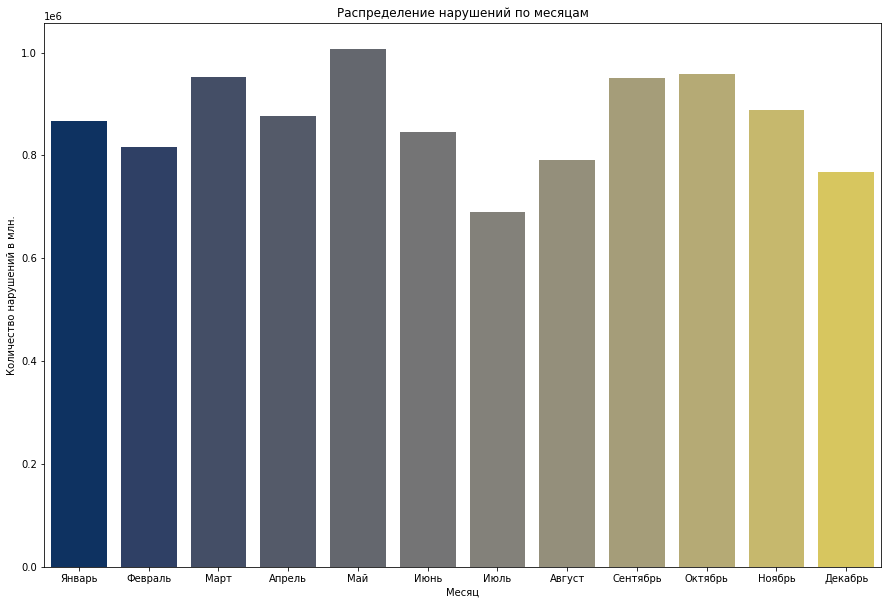

In [253]:
#!c1.32
x_axes = ["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]
plt.figure(figsize=(15, 10))
sns.barplot(x=x_axes, y=monthly_counts, palette="cividis")
plt.title('Распределение нарушений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество нарушений в млн.')

Можно отметить некую сезонность в нарушениях, смотря на данный график - зимой и летом виден некий спад в количестве нарушений, в отличие от довольно высокого уровня весной и осенью. Зимой можно объяснить спад, возможно, тем что люди меньше ездят на машине из-за погоды и непростых дорожных условиях. Летом, можно предположить, что люди уезжают из города в отпуска и общее количество машин немного уменьшается

In [ ]:
#!c1.32
veh_body_type = np.where(~df["Vehicle Body Type"].isin(df["Vehicle Body Type"].value_counts().index[0:4]), 'Other', df["Vehicle Body Type"])
viol_desc = np.where(~df["Violation Description"].isin(df["Violation Description"].value_counts().index[0:6]), 'Other', df["Violation Description"])

Text(0, 0.5, 'Тип нарушения')

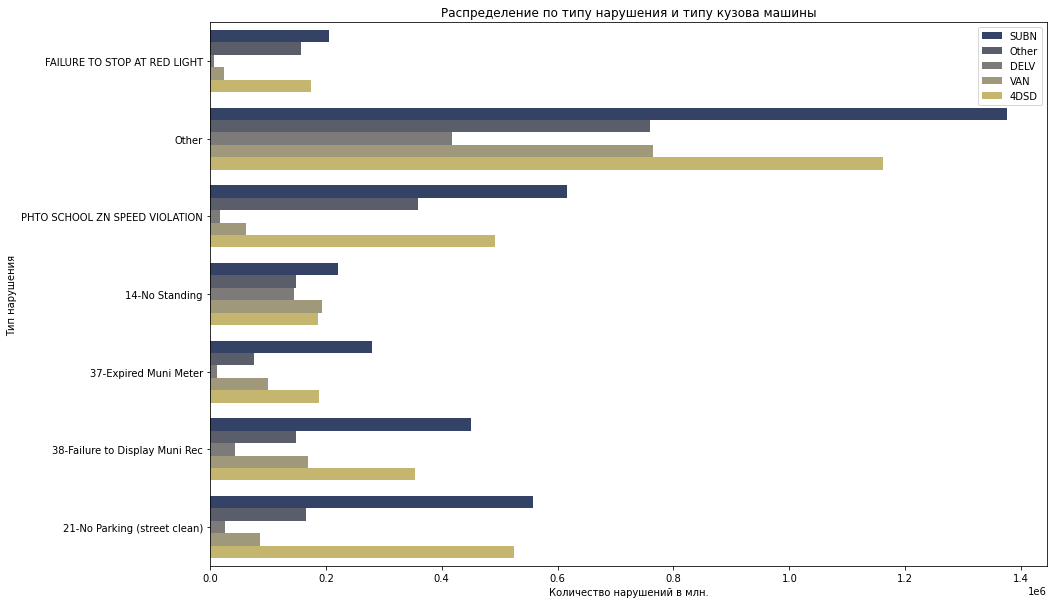

In [274]:
#!c1.32
plt.figure(figsize=(15, 10))
sns.countplot(y=viol_desc, hue=veh_body_type, palette="cividis")
plt.title('Распределение по типу нарушения и типу кузова машины')
plt.xlabel('Количество нарушений в млн.')
plt.ylabel('Тип нарушения')

In [ ]:
Исходя из этого графика можно сделать вывод о том, что все типы автомобилей нарушают различные правила в равной степени
пропорционально своему количеству, кроме фургонов, они чаще других, в процентном соотношении, стоят не в разрешенном для этого месте

In [226]:
#!c1.32
cars = {'Vehicle Make': df[(df["Vehicle Year"] > 0) & (df["Vehicle Year"] <= 2017)]["Vehicle Make"],
                'Vehicle Year': df[(df["Vehicle Year"] > 0) & (df["Vehicle Year"] <= 2017)]["Vehicle Year"]}
df_cars = pd.DataFrame(cars)
df_cars

,Vehicle Make,Vehicle Year
0,TOYOT,2001
1,TOYOT,2001
2,FORD,2004
3,MITSU,2007
4,INTER,2007
...,...,...
10803021,CADIL,2016
10803022,HONDA,2015
10803024,TOYOT,2007
10803026,JEEP,2011


In [227]:
#!c1.32
df_cars['Vehicle Make'] = np.where(~df_cars["Vehicle Make"].isin(df_cars["Vehicle Make"].value_counts().index[0:5]), 'Other', df_cars["Vehicle Make"])
bins = [1970, 1980, 1990, 2000, 2010, 2017]
labels = ['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2017']
df_cars['Year Category'] = pd.cut(df_cars['Vehicle Year'], bins=bins, labels=labels, right=False)
df_cars

,Vehicle Make,Vehicle Year,Year Category
0,TOYOT,2001,2000-2010
1,TOYOT,2001,2000-2010
2,FORD,2004,2000-2010
3,Other,2007,2000-2010
4,Other,2007,2000-2010
...,...,...,...
10803021,Other,2016,2010-2017
10803022,HONDA,2015,2010-2017
10803024,TOYOT,2007,2000-2010
10803026,Other,2011,2010-2017


Text(0, 0.5, 'Год производства автомобиля')

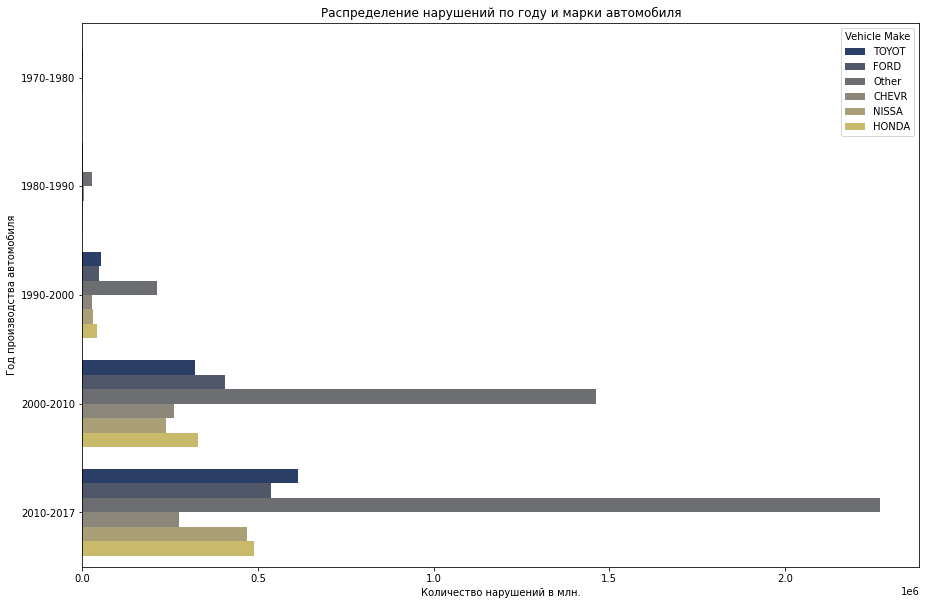

In [272]:
#!c1.32
plt.figure(figsize=(15, 10))
sns.countplot(data=df_cars, y="Year Category", hue="Vehicle Make", palette="cividis")
plt.title('Распределение нарушений по году и марки автомобиля')
plt.xlabel('Количество нарушений в млн.')
plt.ylabel('Год производства автомобиля')

По данному графику видно, что чаще всего выписывают штрафы на новые автомобоили и относительно новые, что говорит о том, что жители Нью-йорка предпочитают ездить на относительно новых автомобилях, что логично. Также стоит отметить то, что в нарушениях присутствует много автомобилей с разными марками. Это говорит нам столбик Other, который многократно превосходит самые популярные автомобили. Это говорит о разнообразности автомобилей, представленном на автомобильном рынке в США. Также столбец Other растет в количественном соотношении намного быстрее по годам, чем самые популярные марки, что говорит о том, что появляется больше различных автомобилей, которые готовы подвинуть лидеров рынка с их места.

In [261]:
#!c1.32
street_counts = df["Street Name"].value_counts()
df_streets

,StreetName,Count
Broadway,Broadway,205669
3rd Ave,3rd Ave,159904
Madison Ave,Madison Ave,98558
5th Ave,5th Ave,90534
Lexington Ave,Lexington Ave,80989
...,...,...
Plaza Street West,Plaza Street West,124
E 211 ST,E 211 ST,124
MERRIAM AVE,MERRIAM AVE,124
St Pauls Ct,St Pauls Ct,124


In [264]:
#!c1.32
from geopy.geocoders import Nominatim
import plotly.express as px
streets_data = {'StreetName': street_counts.index,
                'Count': street_counts}
df_streets = pd.DataFrame(streets_data)
geolocator = Nominatim(user_agent="street_mapping")
df_streets = df_streets[0:5000]

In [265]:
#!c1.32
df_streets['Coordinates'] = df_streets['StreetName'].apply(lambda street: geolocator.geocode(street + ", New York, USA", timeout=10) if geolocator else None)
# Отфильтруем улицы, для которых удалось получить координаты
df_streets = df_streets.dropna()

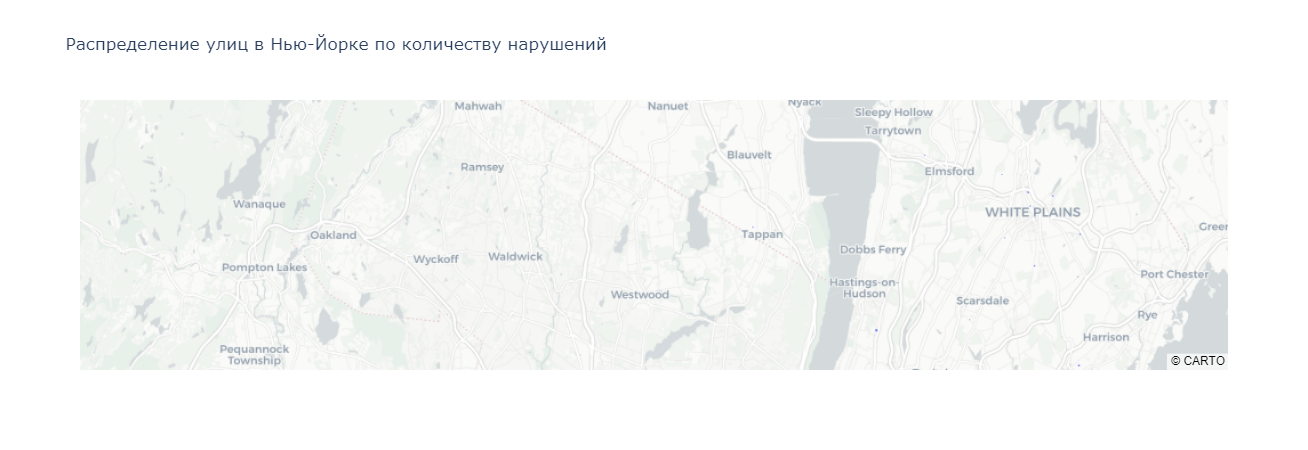

In [281]:
#!c1.32
fig = px.scatter_mapbox(df_streets, 
                        lat=[coord[1][0] if coord else None for coord in df_streets['Coordinates']],
                        lon=[coord[1][1] if coord else None for coord in df_streets['Coordinates']],
                        size='Count',
                        hover_name='StreetName',
                        mapbox_style='carto-positron',  
                        zoom=10,
                        title='Распределение улиц в Нью-Йорке по количеству нарушений')
fig.show()

Text(0, 0.5, 'Количество нарушений')

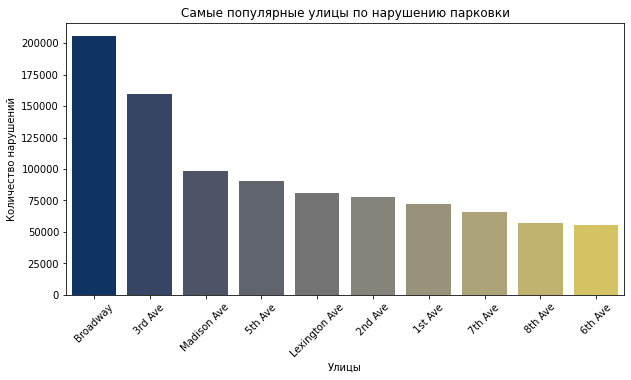

In [275]:
#!c1.32
plt.figure(figsize=(10, 5))
sns.barplot(x=street_counts.index[0:10], y=street_counts[0:10], palette="cividis")
plt.xticks(rotation=45)
plt.title('Самые популярные улицы по нарушению парковки')
plt.xlabel('Улицы')
plt.ylabel('Количество нарушений')

По карте можно определить, что больше всего нарушений происходит в центре города, в районе Манхэттен.

In [282]:
#!c1.32
df

,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Violation County,Violation In Front Of Or Opposite,Street Name,Date First Observed,Law Section,Sub Division,Violation Legal Code,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Feet From Curb,Violation Description
0,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,0,0,0,0,0,0,T103,0000,0143A,BX,F,ALLERTON AVE (W/B) @,0,1111,D,T,GY,1.0,2001,0,FAILURE TO STOP AT RED LIGHT
1,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,0,0,0,0,0,0,T103,0000,0400P,BX,F,ALLERTON AVE (W/B) @,0,1111,D,T,GY,1.0,2001,0,FAILURE TO STOP AT RED LIGHT
2,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,0,0,0,0,0,0,T103,0000,0233P,BX,F,SB WEBSTER AVE @ E 1,0,1111,C,T,BK,1.0,2004,0,BUS LANE VIOLATION
3,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,34330,34350,20180630,14,14,359594,T102,J,1120A,NY,O,7th Ave,0,408,l2,F,WH,1.0,2007,0,47-Double PKG-Midtown
4,NY,COM,11/21/2016,69,DELV,INTER,T,10510,34310,34330,20170228,13,13,364832,T102,M,0555P,NY,F,6th Ave,0,408,h1,F,WHITE,1.0,2007,0,69-Failure to Disp Muni Recpt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10803022,NY,PAS,11/15/2063,40,SUBN,HONDA,P,28590,36590,65050,20170610,109,109,959974,0109,0000,1104P,Q,F,ASH AV,0,408,J2,F,BLK,0.0,2015,2,20A-No Parking (Non-COM)
10803023,NJ,PAS,11/02/2068,21,SDN,HONDA,S,17380,5780,5880,0,68,0,582845,KS10,0000,1207P,K,F,BAY RIDGE AVE,0,408,D1,F,BLACK,0.0,0,0,19-No Stand (bus stop)
10803024,NY,PAS,07/12/2069,20,SUBN,TOYOT,X,93830,64830,23330,20161001,71,976,100519,0976,0000,0750A,K,F,WINTHROP STREET,0,408,D,F,GRAY,0.0,2007,0,46B-Double Parking (Com-100Ft)
10803026,NY,PAS,11/15/2069,40,SUBN,JEEP,P,0,5530,0,20180624,69,69,935065,0069,0000,0319A,K,F,PAERDERGAT,0,408,E2,F,BROWN,0.0,2011,0,FAILURE TO STOP AT RED LIGHT


In [283]:
#!c1.32
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10662498 entries, 0 to 10803027
Data columns (total 29 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Registration State                 object 
 1   Plate Type                         object 
 2   Issue Date                         object 
 3   Violation Code                     int64  
 4   Vehicle Body Type                  object 
 5   Vehicle Make                       object 
 6   Issuing Agency                     object 
 7   Street Code1                       int64  
 8   Street Code2                       int64  
 9   Street Code3                       int64  
 10  Vehicle Expiration Date            int64  
 11  Violation Precinct                 int64  
 12  Issuer Precinct                    int64  
 13  Issuer Code                        int64  
 14  Issuer Command                     object 
 15  Issuer Squad                       object 
 16  Violation Time  

Задача машинного обучения - по имеющимся данным описания нарушения и автомобиля определить, является ли данный автомобиль зарегистрированным. 1 - зарегистрирован, 0 - нет. Это может помочь при составлении штрафа, если описание нарушения будет потенциально попадать под то, что автомобиль может быть незарегистрированным, то сотрудник в данном случае должен точно проверить на месте регистрацию автомобиля и выписать уже 2 штрафа. 

Но для начала еще немного предобработаем данные для обучения. Отсеим ненужную дату и уберем данные, которые сотрудник не будет
знать при выписки билета

In [341]:
#!c1.32
df['Issue Date'] = pd.to_datetime(df['Issue Date'])
df_filter = df[(df["Issue Date"] >= '2016-07-01') & (df["Issue Date"] <= '2017-07-01') & (df["Vehicle Year"] > 0)]
df_filter = df_filter.drop(columns=["Issuer Precinct", "Issuer Squad", "Law Section", "Sub Division", "Issuing Agency", "Issuer Code"])
df_filter

,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Precinct,Issuer Command,Violation Time,Violation County,Violation In Front Of Or Opposite,Street Name,Date First Observed,Violation Legal Code,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Feet From Curb,Violation Description
0,NY,PAS,2016-07-10,7,SUBN,TOYOT,0,0,0,0,0,T103,0143A,BX,F,ALLERTON AVE (W/B) @,0,T,GY,1.0,2001,0,FAILURE TO STOP AT RED LIGHT
1,NY,PAS,2016-07-08,7,SUBN,TOYOT,0,0,0,0,0,T103,0400P,BX,F,ALLERTON AVE (W/B) @,0,T,GY,1.0,2001,0,FAILURE TO STOP AT RED LIGHT
2,NY,PAS,2016-08-23,5,SUBN,FORD,0,0,0,0,0,T103,0233P,BX,F,SB WEBSTER AVE @ E 1,0,T,BK,1.0,2004,0,BUS LANE VIOLATION
3,NY,COM,2017-06-14,47,REFG,MITSU,10610,34330,34350,20180630,14,T102,1120A,NY,O,7th Ave,0,F,WH,1.0,2007,0,47-Double PKG-Midtown
4,NY,COM,2016-11-21,69,DELV,INTER,10510,34310,34330,20170228,13,T102,0555P,NY,F,6th Ave,0,F,WHITE,1.0,2007,0,69-Failure to Disp Muni Recpt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799302,NY,PAS,2017-07-01,71,VAN,HONDA,64890,22810,22840,20160809,115,0113,1021A,Q,F,SUTTER AVE,0,F,GR,0.0,2006,0,68-Not Pkg. Comp. w Psted Sign
10799304,NY,PAS,2017-07-01,71,VAN,FORD,10790,19040,18990,20170531,110,T504,0905A,Q,O,50 AVE,0,F,WHT,0.0,2007,0,14-No Standing
10799307,NY,PAS,2017-07-01,21,SDN,HONDA,0,40404,40404,20170705,88,KN02,0944A,K,F,VANDERBILT AE,0,F,GREY,0.0,2009,0,69-Failure to Disp Muni Recpt
10799309,NY,PAS,2017-07-01,21,FOUR,CHEVR,18240,8440,8590,20171130,115,T504,0939A,Q,O,90 ST,0,F,BLK,0.0,2014,0,19-No Stand (bus stop)


In [342]:
#!c1.32
X = df_filter.drop(columns=["Unregistered Vehicle?"])
y = df_filter["Unregistered Vehicle?"]

In [289]:
#!c1.32
%pip install catboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.7 MB/s eta 0:00:00


In [349]:
#!c1.32
from catboost import CatBoostClassifier
import time
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cat_features = df_filter.select_dtypes(include=['object']).columns.tolist()
catboost_model = CatBoostClassifier(iterations=150, depth=6, learning_rate=0.1, loss_function='Logloss', cat_features=cat_features)
start_time = time.time()
catboost_model.fit(X_train, y_train, verbose=50)
train_time = time.time() - start_time

0:	learn: 0.3737406	total: 743ms	remaining: 1m 50s
50:	learn: 0.0000955	total: 23.1s	remaining: 44.9s
100:	learn: 0.0000955	total: 43.9s	remaining: 21.3s
149:	learn: 0.0000955	total: 1m 4s	remaining: 0us


In [350]:
#!c1.32
y_pred = catboost_model.predict(X_test)
y_pred

array([0., 1., 1., ..., 1., 1., 1.])

In [351]:
#!c1.32
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    135664
         1.0       1.00      1.00      1.00   1504839

    accuracy                           1.00   1640503
   macro avg       1.00      1.00      1.00   1640503
weighted avg       1.00      1.00      1.00   1640503



Модель идеально предсказала данные

Теперь проведем временной анализ обучения модели в зависимости от количества данных и количества ядер, используемых при обучении 

In [354]:
#!c1.32
time_count = []
for i in [10, 25, 50, 75, 100]:
    length = int(X.shape[0]*i*0.01)
    start_time = time.time()
    catboost_model.fit(X[0:length], y[0:length], verbose=50)
    train_time = time.time() - start_time
    time_count.append(train_time)

0:	learn: 0.3664217	total: 141ms	remaining: 21s
50:	learn: 0.0003399	total: 2.82s	remaining: 5.48s
100:	learn: 0.0003218	total: 6.14s	remaining: 2.98s
149:	learn: 0.0003217	total: 8.62s	remaining: 0us
0:	learn: 0.3726425	total: 234ms	remaining: 34.9s
50:	learn: 0.0002016	total: 6.68s	remaining: 13s
100:	learn: 0.0001957	total: 12.9s	remaining: 6.24s
149:	learn: 0.0001957	total: 18.8s	remaining: 0us
0:	learn: 0.3870391	total: 455ms	remaining: 1m 7s
50:	learn: 0.0001361	total: 12.9s	remaining: 25s
100:	learn: 0.0001361	total: 24.5s	remaining: 11.9s
149:	learn: 0.0001361	total: 35.8s	remaining: 0us
0:	learn: 0.3782993	total: 522ms	remaining: 1m 17s
50:	learn: 0.0001082	total: 19s	remaining: 36.9s
100:	learn: 0.0001081	total: 36.2s	remaining: 17.6s
149:	learn: 0.0001081	total: 52.6s	remaining: 0us
0:	learn: 0.3755793	total: 666ms	remaining: 1m 39s
50:	learn: 0.0000946	total: 24.2s	remaining: 47s
100:	learn: 0.0000946	total: 46s	remaining: 22.3s
149:	learn: 0.0000946	total: 1m 7s	remaining:

In [355]:
#!c1.32
time_count

[18.333431720733643,
 23.749000310897827,
 45.35300040245056,
 66.98996639251709,
 86.4053156375885]

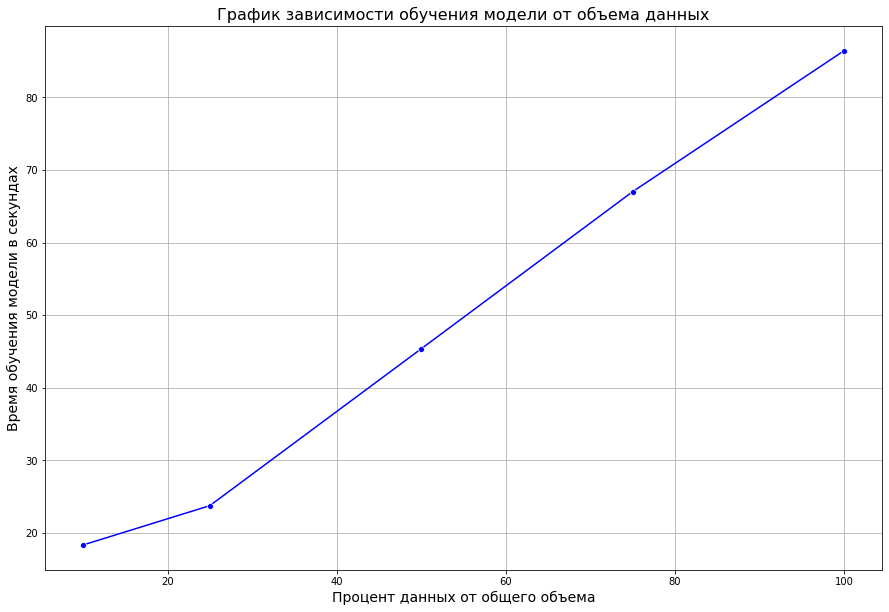

In [388]:
#!c1.32
plt.figure(figsize=(15, 10))
sns.lineplot(x=[10, 25, 50, 75, 100], y=time_count, marker='o', color='b')
plt.title('График зависимости обучения модели от объема данных', fontsize=16)
plt.xlabel('Процент данных от общего объема', fontsize=14)
plt.ylabel('Время обучения модели в секундах', fontsize=14)
plt.grid(True)
plt.show()

In [380]:
#!c1.32
time_cores=[]

In [382]:
start_time = time.time()
catboost_model.fit(X, y, verbose=50)
train_time = time.time() - start_time
time_cores
time_cores.append(train_time)

0:	learn: 0.3755793	total: 3.04s	remaining: 7m 33s
50:	learn: 0.0000946	total: 2m 16s	remaining: 4m 25s
100:	learn: 0.0000946	total: 4m 25s	remaining: 2m 8s
149:	learn: 0.0000946	total: 6m 31s	remaining: 0us


In [383]:
#!c1.8
start_time = time.time()
catboost_model.fit(X, y, verbose=50)
train_time = time.time() - start_time
time_cores
time_cores.append(train_time)

0:	learn: 0.3755793	total: 1.77s	remaining: 4m 24s
50:	learn: 0.0000946	total: 1m 16s	remaining: 2m 28s
100:	learn: 0.0000946	total: 2m 28s	remaining: 1m 12s
149:	learn: 0.0000946	total: 3m 39s	remaining: 0us


In [384]:
#!c1.32
start_time = time.time()
catboost_model.fit(X, y, verbose=50)
train_time = time.time() - start_time
time_cores
time_cores.append(train_time)

0:	learn: 0.3755793	total: 752ms	remaining: 1m 51s
50:	learn: 0.0000946	total: 25.7s	remaining: 49.8s
100:	learn: 0.0000946	total: 48s	remaining: 23.3s
149:	learn: 0.0000946	total: 1m 9s	remaining: 0us


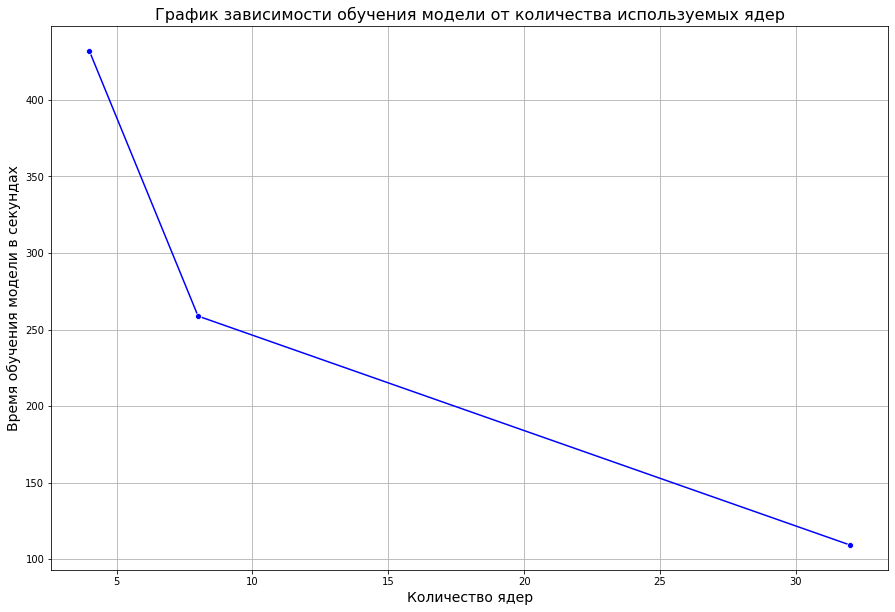

In [387]:
#!c1.32
plt.figure(figsize=(15, 10))
sns.lineplot(x=[4, 8, 32], y=time_cores, marker='o', color='b')
plt.title('График зависимости обучения модели от количества используемых ядер', fontsize=16)
plt.xlabel('Количество ядер', fontsize=14)
plt.ylabel('Время обучения модели в секундах', fontsize=14)
plt.grid(True)
plt.show()

In [386]:
#!c1.32
time_cores

[431.93259620666504, 258.8052201271057, 109.2747163772583]